# Quantile Trading Project

## Manoj Bhardwaj (12244130)
## Umang Gupta (12244138)
## Yao Wen Ian Chung (12248562)

## Tactical Stock Selection Model

### Objective:

To analyze if a profitable tactical stock selection model can be built using a quantitative blend of feature engineering, factor based quantile trading and factor timing in a beta neutral construct in the US equity markets. The idea is to identify attractive as well as unattractive stocks at every month-end and take a long and a short position in them respectively at every month end date.

### Construct:

#### Backtest Period: 
Jan 2011 to March 2020

#### Assumptions
Leverage of 5x, and a funding cost based on the prevailing risk free rates (Obtained from Fama French Website) for the long leg.
A monthly ransaction Cost of 0.2%.

Benchmark based on Fama French Five Factor model.


#### Factor Construction:
- 15 different equity factors have been constructed from various factor styles such as value, growth, momentum, quality and low risk for every month end date from the period Jan 2007 to Feb 2020.
<i> Fundamental Data has been collected from Zacks Investment Research from Quandl </i>
- A sector neutral version of each of the factors have been constructed by dividing them by mean of that factor of all stocks on that date cross-sectionally and dividing by the standard deviation (z-score). These factors in addition to the original factors, take total of our factors to 30.
- It has been made sure to consider stocks for a specific date only if all 30 factor scores are available for that particular stock on that month end date.


#### Macro-economic Variables
 - Data for 11 different macro-economic variables has been collected for the period 2007 to 2020. 
 - These macro-economic variables we believe are potential leading indicators of the economy and can be instrumental in the process of factor timing.
 
#### Recipe of the chosen Stock Selection Model:

Of the variants that were tried a Logistic Regression based model with beta neutral long short spread was chosen as the best construct:

- Firstly, beta neutral long short spreads of each of the factors are constructed from the period 2007 to 2020. Beta neutral long short spread is obtained as the difference of the decile 10 return - decile 1 return * (beta of decile 10/ beta of decile 1). These two beta coefficients are computed by regressing the decile returns against the equi-weighted universe of our securities with a rolling training window of 48 months, at every month end date. We choose trailing 48 month's data because we believe 48 months cover sufficient amount of data to not build spurious relations, but higher size than this means that we go more out of tune with the most recent data.

- Secondly, we run a random forest classifier to identify the most essential macro-economic variables (limited to 5) for each factor on each month-end-date. After obtaining this we obtain the probability of positive performance of the factor by running a logistic regression model on the forward 1 month return of a factor's long short spreads against last 48 month macro-economic data of the selected features, at every month end date.

- For each month in our backtest period, we pick the 4 factors with the highest probabilities of positive performances in the following month subject to a constraint that none of the factors' beta neutral long-short spreads have a correlation greater than 80%.

- After obtaining the 4 best factors at every month end date (factor timing), we go on to calculate a much "powerful" alpha score for each stock on every month end date. This "powerful" alpha score is essentially a combination of factor scores of the 4 factors selected as the best factors in the previous step.

- This alpha score is built by first calculating a z-score of each of the 4 selected factors for each stock at every month end date. Then we take a mean of these 4 z-scores for each stock, which in our minds is an even stronger and diversified alpha score than any single factor.

- We rank our universe on the basis of this newly constructed factor and then again build a beta neutral long short spread for this combined factor, using the same process as mentioned in step 1. This beta neutral long short spread is essentially the gross unlevered return of our strategy.

- However, for calculating the beta neutral spread for the combined model, we obtain trailing 48 month betas every month using this combined score, for achieving this,  we first compute the 48 month trailing decile 10 and decile 1 returns at every month end date using the combination of the selected factors, compute their betas against the equi weighted universe respectively, and then compute the following month's beta neutral spread using the betas obtained retrospectively.   

- So in essence, every month we would have some variation in the best 4 selected factors. This would lead to a change in selection of stocks as well as the relative positioning of the long and the short leg (because of updating betas) Thus our strategy follows a monthly rebalancing.

### Results and Risks

Our strategy yields a net Sharpe Ratio of 0.63 with leverage (5x) driven annualized returns of 31% and annualized standard deviation of 48%. There is some excess value over Fama French Five Factor Model as well, in such that we get an Info Ratio of .174 on our residual. The strategy also has a high hit rate of 63% which is exactly what our classification based model was intended to capture, in such that we were trying to maximize our probability of positive performance.

While we did attempt to attain beta neutrality, our strategy does have some positive exposure to the Fama French Market Risk Factor. We based our long short positions on the betas obtained from the relations in the trailing 48 months, thus our beta hedging is imperfect.

Our long short model does not have a strong exposure to the size premium, however there is some negative exposure to FF value factor. There is  significant (strongest) exposure to the Fama French RMW factor, which is unsurprising considering profitability based factors (Profit Margin, Earnings Yield) featured majorly in our factor selection.  

Further we tested some variants to see  our strategy's sensitivity to some of our parameters such as training period, beta estimation period and number of selected best factors to build the combined factor. We observed that results do not change drastically upon changes in any of the parameter values. Thus our strategy is robust in that sense.

### Other Variants Tried

While we propose one final strategy based on beta neutral long short spreads subjected to a logistic regression, but we tried various constructs to strengthen our insights on the entire process, while at the same time engaging in stress-testing and gauging the sensisitivity of our strategy to some of the parameters.

1. Logistic Regression on Long Short Spreads (Non Beta Neutral): In this model, we ran the logistic regression model on the long short spreads rather than the beta neutral long short spreads. Thus our factors would have a strong exposure to betas, in a sense the classification model would not just hunt for those factors which have the highest factor risk premia but also the market risk premia, which is not the core goal of our strategy, we intend to maximize the alpha. Beta neutral long short spread is calculated as follows.

<center> $LSS_{fac} = r_{fac}^{decile10}-\frac{\beta_{fac}^{decile10}}{\beta_{fac}^{decile1}}r_{fac}^{decile1}$ </center>
2. Support Vector Machine on Long Short Spreads (Non Beta Neutral): Very similar to variant one, with the only exception that we ran Support Vector Machine instead of logistic regression on this construct.

3. Support Vector Machine on Long Short Spreads (Beta Neutral): Very similar to the chosen model whose recipe is described in detail earlier, but with the only exception that we ran Support Vector Machine instead of logistic regression.

4. Original construct with beta neutral long short spread but beta computation for the final execution done on last 2 years instead of 4. We tried if we can get a better beta hedging using this variant.

5. Original construct with beta neutral long short spread but combined factor being built on 2 best factor instead of 4, it is worth testing if this might help us generate even more superior returns, although with a cost to diversification.

6. Original construct with beta neutral long short spread but the classification/regression training size reduced to 24 months instead of 48. We would expect that a training model on reduced training size to be more quick in adapting to changing economic environment but it might be sensitive to outliers.


### Biases Addressed:

1. We tried to eliminate survivorship bias by allowing stocks which are no longer actively traded to be a part of the analysis.

2. We eliminated look-ahead bias by building factors by only look at the fundamental data available as on the last available filing date.


In [58]:
%matplotlib inline
%reset
from Bhardwaj_Gupta_Chung_final_strat import *

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Factor Construction

In [59]:
factors = process_factors()
factors

Ticker       Date      Price                  Sector  \
0          ABR 2007-10-31   7.735566                 Finance   
1           BC 2007-10-31  19.196452  Consumer Discretionary   
2          AEP 2007-10-31  28.776219               Utilities   
3         OPOF 2007-10-31  14.788474                 Finance   
4          FII 2007-10-31  21.582201                 Finance   
...        ...        ...        ...                     ...   
1598665     SO 2020-04-30  56.730000               Utilities   
1598666     AP 2020-04-30   3.740000     Industrial Products   
1598667   NCBS 2020-04-30  55.020000                 Finance   
1598668   TRWH 2020-04-30  15.780000  Consumer Discretionary   
1598669    EQT 2020-04-30  14.590000             Oils/Energy   

                    Factor  Factor Value  
0        Price to Earnings      4.420323  
1        Price to Earnings     30.470559  
2        Price to Earnings     63.947154  
3        Price to Earnings     36.971185  
4        Price to Earnings     79.934079  
...                    ...           ...  
1598665   6 Month Momentum     -0.077399  
1598666   6 Month Momentum     -0.036082  
1598667   6 Month Momentum     -0.202378  
1598668   6 Month Momentum     -0.368568  
1598669   6 Month Momentum      0.369711  

[1598670 rows x 6 columns]

['1 Month Volatility', 'Revenue Growth', '3 Month Volatility', '3 Month Momentum', 'Price To Book Ratio', '12-1 Momentum', '6 Month Momentum', 'Price to Earnings', 'Debt To Market Cap', 'Asset Turnover', '6 Month Volatility', 'Dividend Yield', 'Free Cash Flow Yield', 'Return on Investment', 'Profit Margin']


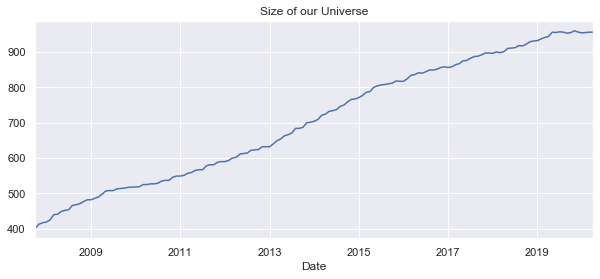

In [3]:
factors[factors["Factor"] == factors["Factor"][0]].groupby(['Date'])['Ticker'].agg('count').plot(figsize = (10,4),title = "Size of our Universe")
print(list(set(factors["Factor"])))

At every month end date we would have all those stocks in our universe for which we are able to generate each one of the 15 factor values. We observe that our universe exapands from having around 400 stocks in 2008 to around 950 by the end of our backtest period. For factors based on fundamental data, we have made sure to construct them using the data available as on the last filing date, to avoid look-ahead bias.

We have built the following factors:

- 1-Month Volatility: This is essentially a low risk factor. We take a long position in low volatility stocks whereas short position in high volatility stocks.

- Price to Earnings: This is essentially a value factor. PE factor would put stocks with negative earnings into the long decile, thus we have converted this into earnings yield and we go long on stocks with high earnings yield and short on stocks with low earnings yield.

- 3-Month Volatility: Much like the 1 month volatility factor, this is a low risk factor, and we take a long position in low volatility stock and vice versa.

- 3-Month Momentum: This is essentially a price momentum factor, we have computed the past 3 month's returns for each stock and hypothesize that stocks which have done well will continue to do so and thus go long on them, while taking a short bet on stocks which haven't performed well.

- Profit Margin: This is essentially a quality or a profitability factor which measure the amount of earnings a company generates per dollar of revenue it makes. We would go long on stocks with high profit margin and vice versa.

- Dividend Yield: This is a value factor, and much like earnings yield, we go long on stocks with high dividend yield and vice versa.

- 12 - 1 Month Momentum: Most tests on momentum show the factor is not persistent in the very short term or in periods of greater than a year. This measure takes that into consideration by looking at a stock's return over the past 12 months while at the same time excluding the most recent month. We take a long bet on stocks with high score and vice versa.

- Debt-to-Market Cap: This is a low risk metric, and we take an inverted position in this factor, such that we go long on stocks with low debt to market cap and vice versa.

- 6 Month Volatility: This is a low risk metric, and we take a long position in stocks with low metric and vice versa.

- 6 Month Momentum: This is a price momentum factor, and we take a long position on stocks with high score and vice versa.

- Asset Turnover Ratio: This is a quality factor and we take a long position for stocks which generate higher sale for every dollar of asset it possesses and vice versa.

- Return on Investment: This is a quality factor and we take a long position in stocks which generate a higher return on investment and vice versa.

- Revenue Growth: In this factor we calculate the growth of a stocks total revenue over a year and we take a long position in stocks with higher score and vice versa.

- Free Cash Flow Yield: This factor is a value factor again, and might give a strong representation of company's operations, especially to investors who recognize importance of cash generations. We take a long position in stocks which have higher free cash flow to market price.

- Price-To-Book ratio: This factor is a value factor and assesses how much expensive a stock is trading relative to it's book value. We take a long position in stocks with lower price to book ratio or cheap stocks whereas, a short position in stocks with higher price to book (expensive stocks).

Furthermore, we build sector neutral version of each of these factors by converting them into z-scores using sector means and standard deviation of these factors. Thus we have 30 factors for each stock at every month end date.

## Construction of Long Short Spreads

In [4]:
df1,data = ranking(factors,'1M',10)

In [5]:
df1

Date                   Factor       1.0       2.0       3.0  \
0    2007-11-30       1 Month Volatility -0.064783 -0.090281 -0.057422   
1    2007-11-30            12-1 Momentum -0.098239 -0.053100 -0.054927   
2    2007-11-30         3 Month Momentum -0.116714 -0.055397 -0.034719   
3    2007-11-30       3 Month Volatility -0.086209 -0.062374 -0.073921   
4    2007-11-30         6 Month Momentum -0.105183 -0.082760 -0.045727   
...         ...                      ...       ...       ...       ...   
4495 2020-04-30   SN-Price To Book Ratio  0.178455  0.158059  0.113703   
4496 2020-04-30     SN-Price to Earnings  0.229266  0.084954  0.071751   
4497 2020-04-30         SN-Profit Margin  0.172546  0.142748  0.136348   
4498 2020-04-30  SN-Return on Investment  0.250836  0.148360  0.080585   
4499 2020-04-30        SN-Revenue Growth  0.155847  0.112070  0.112724   

           4.0       5.0       6.0       7.0       8.0       9.0      10.0  \
0    -0.058980 -0.053284 -0.051210 -0.050876 -0.037114 -0.031217 -0.021865   
1    -0.063423 -0.048700 -0.036541 -0.019378 -0.030568 -0.039145 -0.071763   
2    -0.052916 -0.037519 -0.035476 -0.015190 -0.053360 -0.054178 -0.060596   
3    -0.060962 -0.054376 -0.052686 -0.036848 -0.043940 -0.038359 -0.007711   
4    -0.034051 -0.044014 -0.033452 -0.038890 -0.041073 -0.024942 -0.065842   
...        ...       ...       ...       ...       ...       ...       ...   
4495  0.124119  0.124981  0.097683  0.160712  0.190348  0.237255  0.242835   
4496  0.131790  0.112985  0.185204  0.217490  0.167671  0.196011  0.233036   
4497  0.117317  0.105126  0.155997  0.200264  0.264816  0.188548  0.147679   
4498  0.082655  0.116018  0.148105  0.157078  0.191890  0.224236  0.231886   
4499  0.179993  0.247375  0.151420  0.134221  0.134779  0.190119  0.210884   

           Mkt      11.0  
0    -0.051629  0.042917  
1    -0.051629  0.026476  
2    -0.051629  0.056119  
3    -0.051629  0.078498  
4    -0.051629  0.039341  
...        ...       ...  
4495  0.163009  0.064380  
4496  0.163009  0.003769  
4497  0.163009 -0.024866  
4498  0.163009 -0.018949  
4499  0.163009  0.055037  

[4500 rows x 14 columns]

For each of the 30 factors we have computed decile wise returns with Decile 10 being the most favorable decile and decile 1 being the least favorable one for every month end date. Decile 11.0 indicates the long-short spread i.e. the Decile 10 - Decile 1 Return of the specific factor. SN indicates that the factor is a sector neutral one.

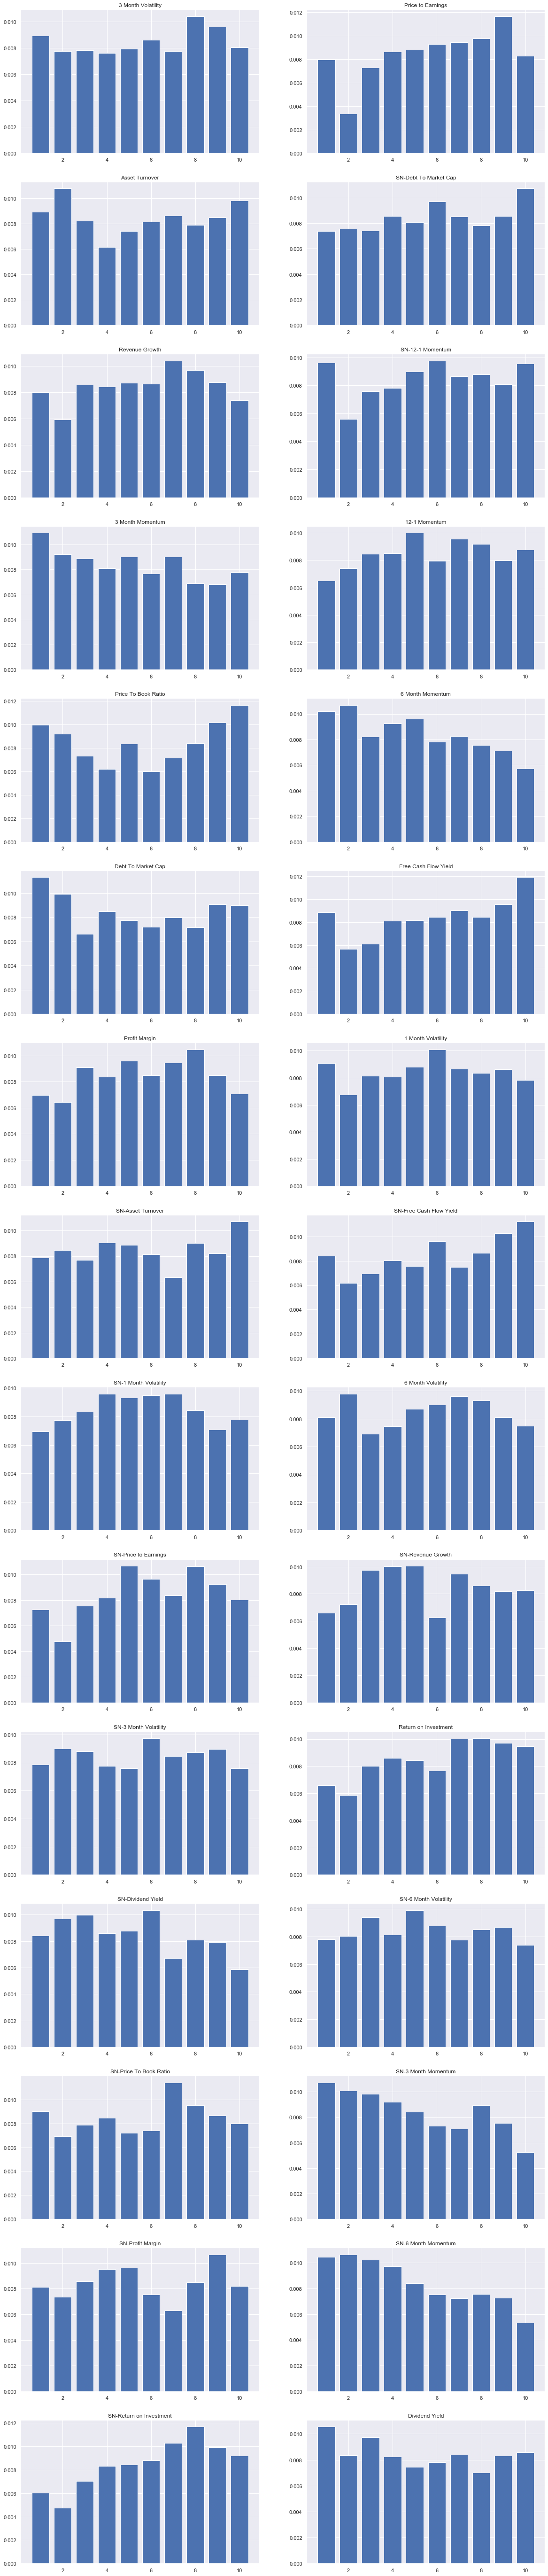

In [6]:
plot_quantile(df1)
None

We have computed decile wise 1 month returns of each of the factors. As per our hypotheses, the decile 10 bars should be higher than decile 1 returns. Also a factor which shows some sort of monotonicity of increase across deciles would be considered to have an even better discriminatory power. Return on Investment, Free Cash Flow yield and asset turnover are the only factors which show some pattern in our favour. Rest of the factors do not paint a very rosy picture for our analysis. Momentum factor especially seems to show an exact reverse trend of what we hypothesised.

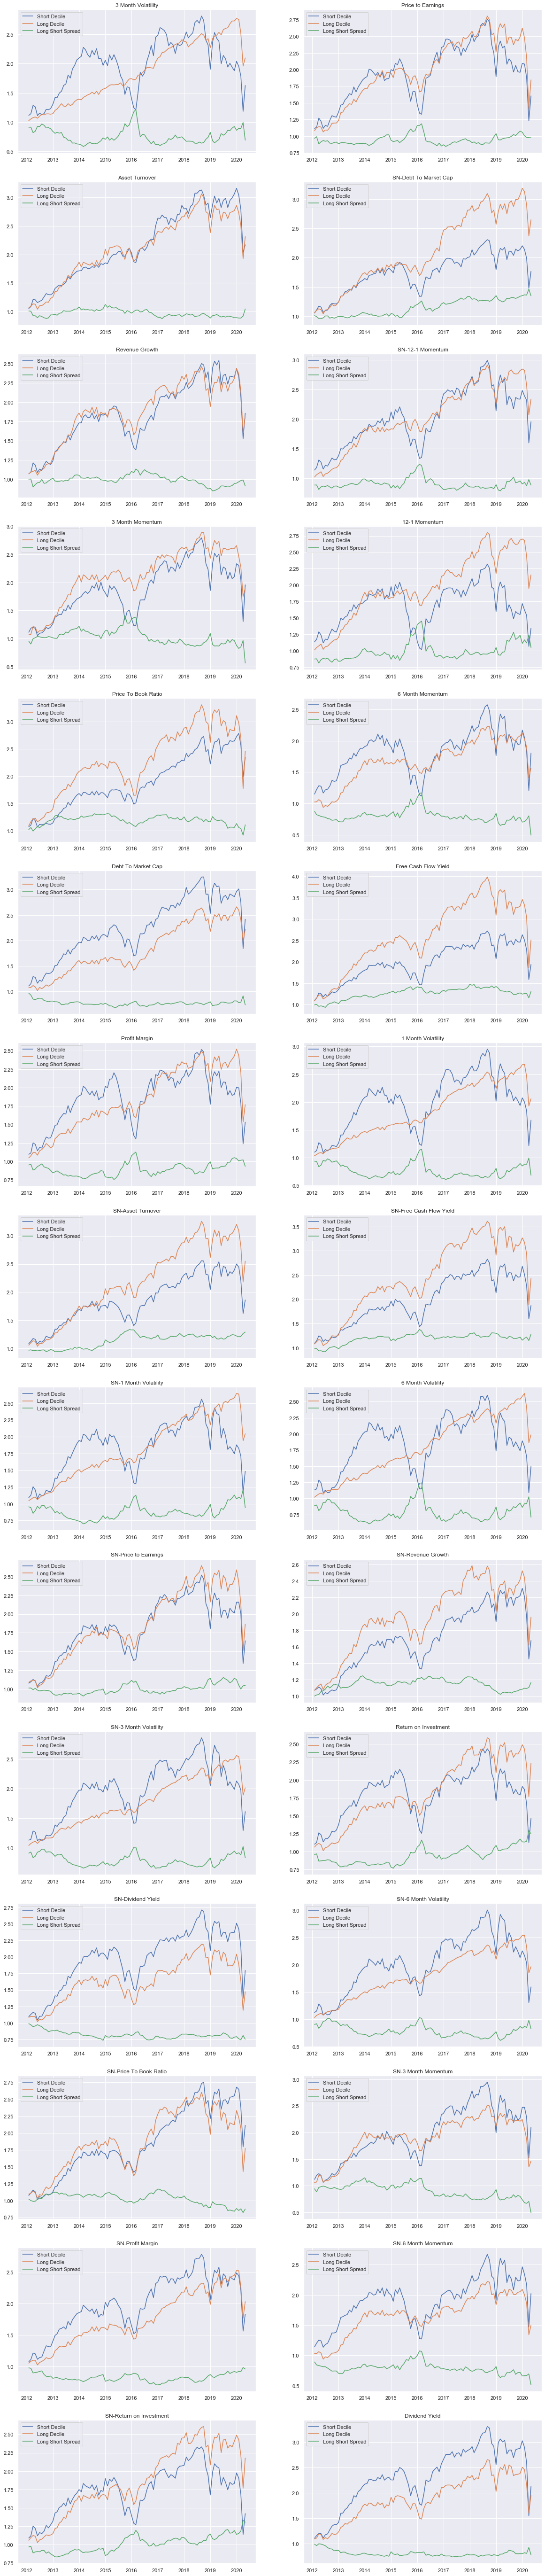

In [7]:
plot_returns(df1)

Having had a look at the decile bars earlier, we could not have expected great cumulative returns for most of our factors which is exactly what we witness here. A very few factors were able to generate positive long short spreads, let alone generate great value. However we observe that largely long deciles have been able to generate strong performances with less volatility, but short deciles which have very high volatility somewhat superior returns. But we would expect long deciles to generate superior performances on a risk adjusted basis. However, in the current construct it appears that factor models do not essentially capture just the factor risk premia but a market risk premia as well, because decile 1 (unattractive) stocks tend to have a higher beta than the decile 10 (attractive) stocks, this gives us an indication that a beta neutral long short spread may actually be a better series to measure the true factor risk premia. 

In [8]:
residual_formatted, reg_beta = reg_LS_spread_vs_FFM5 (df1,famafrenchdata)

### Exposure of our factors long short spreads to Fama French 5 Factors

In [9]:
reg_beta*100

Mkt-RF        SMB        HML        RMW  \
1 Month Volatility        -1.02687    -0.7391  0.0135914   0.698146   
12-1 Momentum            -0.556523  -0.355792  -0.421514   0.480938   
3 Month Momentum         -0.895874  -0.217842 -0.0563974  -0.185882   
3 Month Volatility         -1.0584  -0.785399  0.0125387   0.991183   
6 Month Momentum         -0.957584   -0.24147 -0.0757495  -0.234402   
6 Month Volatility         -1.0321  -0.921312  0.0211496   0.775506   
Asset Turnover             0.40126   0.121024  -0.576149   0.277302   
Debt To Market Cap       -0.613594   0.226452  -0.108106  0.0105416   
Dividend Yield           -0.196985  0.0990155  -0.282586 -0.0972142   
Free Cash Flow Yield      0.050258  0.0372635   0.199176   0.303576   
Price To Book Ratio       0.150725   0.483751   0.258594   0.343609   
Price to Earnings        -0.267698  -0.155178  0.0932371   0.628098   
Profit Margin             -0.46319  -0.162486   0.160078   0.722015   
Return on Investment     -0.216218  -0.298279  -0.253308   0.553189   
Revenue Growth           -0.151198  0.0530316 -0.0746397   0.332137   
SN-1 Month Volatility     -0.68195  -0.720536  -0.119227   0.401238   
SN-12-1 Momentum          -0.41561  -0.306774  -0.472982   0.206736   
SN-3 Month Momentum      -0.662787  -0.173727   0.105218  0.0130677   
SN-3 Month Volatility    -0.618475  -0.777812   -0.28119   0.444888   
SN-6 Month Momentum      -0.700453  -0.146425 -0.0998402   0.164776   
SN-6 Month Volatility    -0.567345  -0.855195  -0.337945   0.506851   
SN-Asset Turnover         -0.14816  -0.116414    0.16524  0.0571696   
SN-Debt To Market Cap    -0.390919   0.126193  0.0416893  0.0806362   
SN-Dividend Yield         -0.13188   0.147426  -0.109366   0.171295   
SN-Free Cash Flow Yield   0.078493  -0.157794   0.142775   0.240118   
SN-Price To Book Ratio   0.0440692   0.386433   0.200429   0.280504   
SN-Price to Earnings    -0.0651416  -0.126719 -0.0273668   0.300704   
SN-Profit Margin         -0.164515  -0.395468  -0.166414   0.558132   
SN-Return on Investment  -0.154901  -0.238866  -0.327286   0.368967   
SN-Revenue Growth        0.0860955  0.0443645  -0.112222   0.182399   

                                CMA  
1 Month Volatility        -0.568178  
12-1 Momentum             -0.323959  
3 Month Momentum         -0.0384431  
3 Month Volatility        -0.721248  
6 Month Momentum          -0.560681  
6 Month Volatility        -0.764962  
Asset Turnover             0.686514  
Debt To Market Cap       0.00933798  
Dividend Yield            0.0814689  
Free Cash Flow Yield       -0.22493  
Price To Book Ratio        0.212043  
Price to Earnings         -0.457351  
Profit Margin             -0.696199  
Return on Investment      -0.293024  
Revenue Growth            -0.125331  
SN-1 Month Volatility      -0.12476  
SN-12-1 Momentum          -0.108757  
SN-3 Month Momentum       -0.046645  
SN-3 Month Volatility    -0.0463761  
SN-6 Month Momentum       -0.492854  
SN-6 Month Volatility    -0.0329269  
SN-Asset Turnover         -0.294231  
SN-Debt To Market Cap      -0.15449  
SN-Dividend Yield          0.296652  
SN-Free Cash Flow Yield   -0.239165  
SN-Price To Book Ratio     0.119398  
SN-Price to Earnings     -0.0762183  
SN-Profit Margin          -0.326377  
SN-Return on Investment   -0.208316  
SN-Revenue Growth         0.0987566

We have further computed the Fama French Five Factor Coefficients of each of our factor's long short spreads, and we can clearly see that a large number of factors have a high negative coefficient to market risk premia. Since our period of analysis which is 2011 to 2020 was largely bullish we would expect our long short spreads which have negative coefficient to market risk largely, to generate negative performances. A very few factors i.e. Free cash flow yield and asset turnover have a positive coefficient to market risk premia, and successfully generated positive performances. This further indicates that these long short spreads do not represent true factor risk premia but are heavily influenced by market risk.

## Testing Persistence of Factor Returns

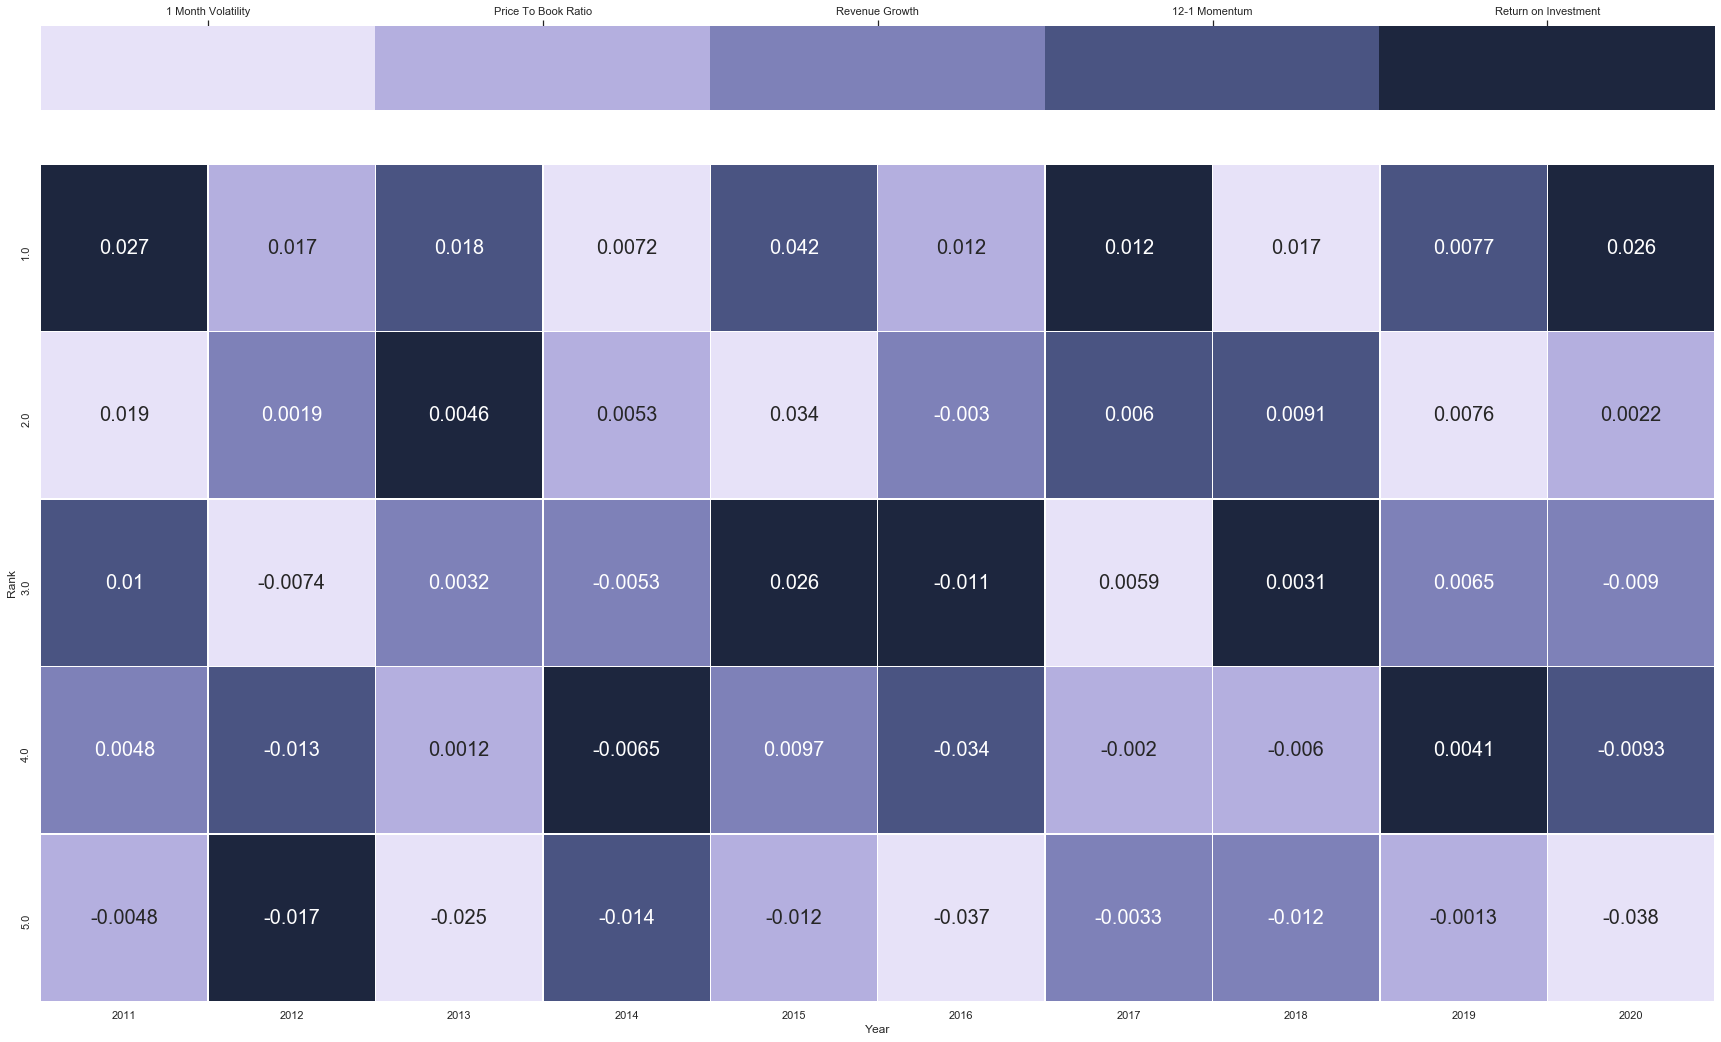

In [10]:
phase_chart(df1[df1['Date']>"2010-12-31"])

We have plotted factor performances of some of our selected factors belonging to different styles. A factor must be persistent in its returns across time for us to be able to create a viable profitable opporunity around it. This charts shows lack of persistent factor returns over time. We observe that Return on Investment was the best performing factor in 2011 from this mix, however a year later it was the worst. Also 1 month volatility happens to be the worst in 2013, but turned out to be a best performer in 2014. This analysis point us towards an idea that there is definitely some potential of factor timing. If we can make a strong predictive model which can predict which factors will perform well and have a discriminatory ability to distinguish between outperformers and underperformers, we will be able to synthesize a profitable recipe around it. This serves as a base to our tactical stock selection models.

# Tactical Stock Selection Models (without Beta Neutrality)

Very similar to the recipe described in the introduction, the key differences are in the construction of individual factor's long short spread as well as the final combined model's long short spread. Instead of trying to find the 4 factors which have the highest beta adjusted long short spread at every month end date, we look at the factors which have the highest non beta adjusted long short spread i.e. simply Decile 10 returns  - Decile 1 returns. The fact that we have already found our long short spreads to have high exposure to beta, this model might not be very effective in capturing the best factors which have the highest factor risk premia, but might find factors which have the highest market risk premia.

### Macro-economic Variables (Explanatory Variables, instrumental in predicting future performances of long short spreads of factors)

In this section we import and clean the macro-economic variables, which serve as the explanatory variables, towards classifying next month's forward long short spread of all factors as positive or negative. 

In [11]:
df_indicators_short, df_indicators_delta_short  = import_indicators('2007-10-30','2020-05-30')
df_indicators_short.tail()

UMCSENT   HOUST  TEDRATE    VIX   PMI  NONFARM  T10Y2YM  UNRATE  \
DATE                                                                          
2019-10-01     95.5  1340.0     0.31  18.56  48.5   151553     0.16     3.6   
2019-11-01     96.8  1371.0     0.40  12.30  48.1   151814     0.20     3.5   
2019-12-01     99.3  1587.0     0.33  14.91  47.8   151998     0.25     3.5   
2020-01-01     99.8  1617.0     0.39  12.47  50.9   152212     0.24     3.6   
2020-02-01    101.0  1567.0     0.20  17.97  50.1   152463     0.17     3.5   

            USSLIND  HOMEPRICE    WTI  
DATE                                   
2019-10-01     1.41    211.774  53.96  
2019-11-01     1.38    212.663  57.03  
2019-12-01     1.48    213.601  59.88  
2020-01-01     1.57    214.560  57.52  
2020-02-01     1.72    215.600  50.54

We have picked 11 macro-indicators, which we believe can help in detecting economic regimes, and thus can have a predictive power in ascertaining which factors have a potential to generate strong performances in the future. We referred to 'The Promises and Pitfalls of Factor Timing' (Bender,Sun,Thomas and Zdorovtsov, 2017) for selection of macro-economic variables. The 11 indicators are as follows:

1). University of Michigan, University of Michigan: Consumer Sentiment [UMCSENT], retrieved from FRED, Federal Reserve Bank of St. Louis

2). Housing Starts: Total: New Privately Owned Housing Units Started (HOUST)

3). TED Spread (TEDRATE): Spread between 3 month US LIBOR and 3 Month US Treasury Rates

4). Volatility Index

5). Purchasing Managers Index: Retrieved from ISM, sourced from Quandl

6). Total Nonfarm, commonly known as Total Nonfarm Payroll, sourced from FRED

7). 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity, sourced from FRED

8). Unemployment Rate (UNRATE), sourced from FRED 

9). Leading Index for the United States (USSLIND), sourced from FRED

10). House Price Index, sourced from FRED

11). Crude Oil Prices: West Texas Intermediate (WTI), sourced from FRED.



In [12]:
df_indicators_short.corr()

UMCSENT     HOUST   TEDRATE       VIX       PMI   NONFARM  \
UMCSENT    1.000000  0.825763 -0.404218 -0.656067  0.407147  0.849297   
HOUST      0.825763  1.000000 -0.107974 -0.563989  0.180779  0.931030   
TEDRATE   -0.404218 -0.107974  1.000000  0.582053 -0.640181 -0.083415   
VIX       -0.656067 -0.563989  0.582053  1.000000 -0.647148 -0.460991   
PMI        0.407147  0.180779 -0.640181 -0.647148  1.000000  0.138328   
NONFARM    0.849297  0.931030 -0.083415 -0.460991  0.138328  1.000000   
T10Y2YM   -0.704465 -0.815574 -0.009327  0.313322 -0.003773 -0.903069   
UNRATE    -0.777732 -0.938647 -0.071777  0.433028 -0.061616 -0.960118   
USSLIND    0.571491  0.409045 -0.681303 -0.738675  0.697439  0.295314   
HOMEPRICE  0.807523  0.893861 -0.041442 -0.400087  0.143828  0.974046   
WTI       -0.558001 -0.403798  0.049774 -0.029718  0.172701 -0.535310   

            T10Y2YM    UNRATE   USSLIND  HOMEPRICE       WTI  
UMCSENT   -0.704465 -0.777732  0.571491   0.807523 -0.558001  
HOUST     -0.815574 -0.938647  0.409045   0.893861 -0.403798  
TEDRATE   -0.009327 -0.071777 -0.681303  -0.041442  0.049774  
VIX        0.313322  0.433028 -0.738675  -0.400087 -0.029718  
PMI       -0.003773 -0.061616  0.697439   0.143828  0.172701  
NONFARM   -0.903069 -0.960118  0.295314   0.974046 -0.535310  
T10Y2YM    1.000000  0.861831 -0.182114  -0.866316  0.493775  
UNRATE     0.861831  1.000000 -0.240016  -0.929779  0.443835  
USSLIND   -0.182114 -0.240016  1.000000   0.181083  0.052307  
HOMEPRICE -0.866316 -0.929779  0.181083   1.000000 -0.541889  
WTI        0.493775  0.443835  0.052307  -0.541889  1.000000

We witness very high correlations in the macro-economic data when we look at levels, which is unsurpsising and something which we kind of expect of macro-economic data. Thus we decide to use changes in levels for some of the series where it makes intuitive sense to do so. Correlations of changes in levels is not as high.

In [13]:
df_indicators_delta_short.corr()

UMCSENT     HOUST   TEDRATE       VIX       PMI   NONFARM  \
UMCSENT    1.000000 -0.088148 -0.172937 -0.204094  0.097868  0.008501   
HOUST     -0.088148  1.000000 -0.082705 -0.052834  0.161270  0.139477   
TEDRATE   -0.172937 -0.082705  1.000000  0.267407 -0.251031  0.134199   
VIX       -0.204094 -0.052834  0.267407  1.000000 -0.252587 -0.033652   
PMI        0.097868  0.161270 -0.251031 -0.252587  1.000000  0.024854   
NONFARM    0.008501  0.139477  0.134199 -0.033652  0.024854  1.000000   
T10Y2YM    0.002458  0.002453  0.157390 -0.074217  0.095273 -0.139997   
UNRATE    -0.175044 -0.158184  0.029114 -0.011210  0.060258 -0.556776   
USSLIND    0.166260  0.146434 -0.133507 -0.168612  0.198913  0.126748   
HOMEPRICE  0.086469  0.156700  0.042266 -0.078630  0.129032  0.667382   
WTI        0.012258  0.141006 -0.226615 -0.325102  0.402590  0.108147   

            T10Y2YM    UNRATE   USSLIND  HOMEPRICE       WTI  
UMCSENT    0.002458 -0.175044  0.166260   0.086469  0.012258  
HOUST      0.002453 -0.158184  0.146434   0.156700  0.141006  
TEDRATE    0.157390  0.029114 -0.133507   0.042266 -0.226615  
VIX       -0.074217 -0.011210 -0.168612  -0.078630 -0.325102  
PMI        0.095273  0.060258  0.198913   0.129032  0.402590  
NONFARM   -0.139997 -0.556776  0.126748   0.667382  0.108147  
T10Y2YM    1.000000  0.002421  0.102690  -0.066311  0.185785  
UNRATE     0.002421  1.000000 -0.189194  -0.428968 -0.076607  
USSLIND    0.102690 -0.189194  1.000000   0.157254  0.220719  
HOMEPRICE -0.066311 -0.428968  0.157254   1.000000  0.075199  
WTI        0.185785 -0.076607  0.220719   0.075199  1.000000

### Support Vector Machine Model and Logistic Regression Models

In [14]:
train_period = 48
num_features = 5
prob_table = create_prob_table (df1,train_period,df_indicators_delta_short,df_indicators_short,num_features)

In [15]:
prob_table[prob_table["Date"] == "2020-02-29"].sort_values("Log_Prob",ascending = False)

Date                   Factor  SVM_Prob  Log_Prob
2375  2020-02-29        SN-Dividend Yield  0.247343  0.712460
2078  2020-02-29    SN-6 Month Volatility  0.468199  0.698461
1286  2020-02-29            Profit Margin  0.694548  0.684940
395   2020-02-29       3 Month Volatility  0.562262  0.674518
197   2020-02-29            12-1 Momentum  0.589861  0.673488
1385  2020-02-29     Return on Investment  0.630097  0.627591
1682  2020-02-29         SN-12-1 Momentum  0.586628  0.618621
593   2020-02-29       6 Month Volatility  0.579507  0.608554
1880  2020-02-29    SN-3 Month Volatility  0.473154  0.597404
2771  2020-02-29         SN-Profit Margin  0.600167  0.593853
98    2020-02-29       1 Month Volatility  0.550631  0.587421
890   2020-02-29           Dividend Yield  0.557015  0.574163
2672  2020-02-29     SN-Price to Earnings  0.540760  0.570070
791   2020-02-29       Debt To Market Cap  0.542043  0.564788
1583  2020-02-29    SN-1 Month Volatility  0.550971  0.559256
2969  2020-02-29        SN-Revenue Growth  0.478503  0.558998
1484  2020-02-29           Revenue Growth  0.530220  0.556998
989   2020-02-29     Free Cash Flow Yield  0.483956  0.515587
1187  2020-02-29        Price to Earnings  0.512843  0.509875
2474  2020-02-29  SN-Free Cash Flow Yield  0.469578  0.446499
2870  2020-02-29  SN-Return on Investment  0.584696  0.437749
2276  2020-02-29    SN-Debt To Market Cap  0.524481  0.418955
2177  2020-02-29        SN-Asset Turnover  0.478306  0.400008
692   2020-02-29           Asset Turnover  0.453161  0.350061
1088  2020-02-29      Price To Book Ratio  0.255630  0.340803
1979  2020-02-29      SN-6 Month Momentum  0.393576  0.338717
494   2020-02-29         6 Month Momentum  0.343955  0.296494
2573  2020-02-29   SN-Price To Book Ratio  0.425884  0.265114
296   2020-02-29         3 Month Momentum  0.238876  0.202539
1781  2020-02-29      SN-3 Month Momentum  0.215866  0.126443

In this section we first run a random forest classifier on past 48 months of training data to identify the most important macro-economic features for each factor at every month end date, limiting number of features to be 5. 

Furthermore, we run two models (1) logistic regression model and (2) Support vector machine using selected features with past 48 months of training data, to predict probabilities of factor long short spread to be positive in the following month at every month end date for each factor. The above snapshot shows an output of dataframe for the last date for our backtesting period. 

While we could have entertained a regression model which would give us a predicted return for each of the factors, we believe because of non-linearities a classification model would be much easier to fit and get more realistic predictions. 

<a id = "specs"></a>
Specifications of the two models:

1) Logistic Regression: Limited to 5 Macroeconomic variables, data fitting being done on trailing 48 months, and predicting 1 month forward probability

2) Support Vector Machine: Linear Kernel Function, Limited to 5 Macroeconomic variables, data fitting being done on trailing 48 months, and predicting 1 month forward probability

<i>  We choose trailing 48 month's data because we believe 48 months cover sufficient amount of data to not build spurious relations, but higher size than this means that we go more out of tune with the most recent data. </i>

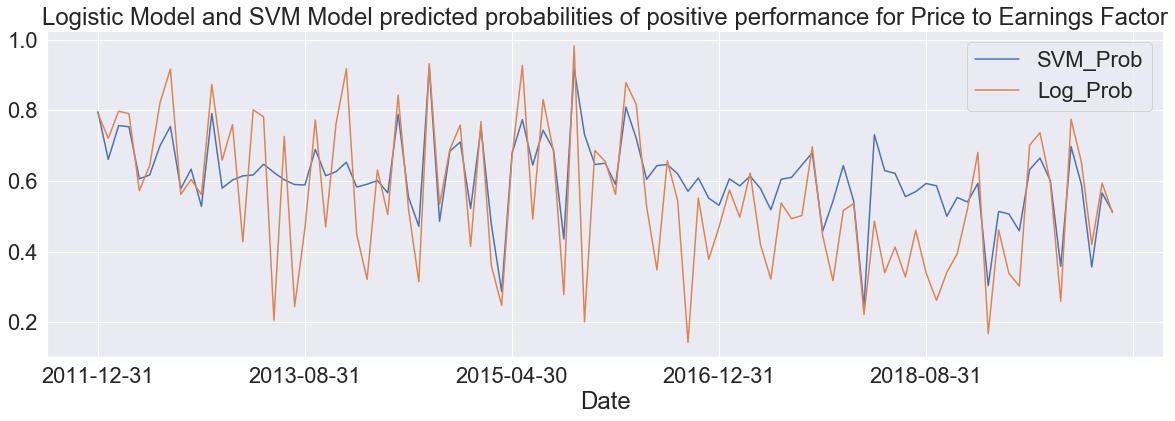

In [16]:
EY = prob_table[prob_table["Factor"] == "Price to Earnings"]
EY = EY.set_index("Date")
EY.plot(figsize = (20,6),title = "Logistic Model and SVM Model predicted probabilities of positive performance for Price to Earnings Factor")

This chart helps us visualize the probabilities of positive performances predicted by the SVM and the Logistic Regression Model. We observe that Logistic Model's estimates are more quickly adaptive to changing environment, at the same time they are more sensitive to outliers, thus have a higher tendency to overfit. SVM is based on the geometrical properties of the series and tries to find a hyperplane that separates the two classes with the best possible margin whereas logistic model tries to find the line of best fit.  

### Finding the 4 best factors

In [17]:
SVMmodel,Logmodel,corr = best_fac(prob_table,df1)
Logmodel[Logmodel["Date"] == "2020-02-29"]

Date                 Factor  Log_Prob  Log_Rank
2375  2020-02-29      SN-Dividend Yield  0.712460       1.0
2078  2020-02-29  SN-6 Month Volatility  0.698461       2.0
1286  2020-02-29          Profit Margin  0.684940       3.0
890   2020-02-29         Dividend Yield  0.574163       4.0

We pick the 4 best factors for both model with the highest probabilities of positive performance, i.e. their long short spreads to have the highest probabilities of positive performance in the following month. In doing so, we ensure that none of the factor's long short spreads had a correlation greater than 0.8

In [18]:
corr[(corr["Factor"].isin(['SN-Dividend Yield','SN-6 Month Volatility','Profit Margin','Dividend Yield'])) & \
     (corr["Date"] == "2020-02-29")][["Date","Factor",'SN-Dividend Yield','SN-6 Month Volatility','Profit Margin','Dividend Yield']]

Date                 Factor  SN-Dividend Yield  \
4418 2020-02-29         Dividend Yield           0.649998   
4422 2020-02-29          Profit Margin           0.199735   
4430 2020-02-29  SN-6 Month Volatility          -0.023944   
4433 2020-02-29      SN-Dividend Yield           1.000000   

      SN-6 Month Volatility  Profit Margin  Dividend Yield  
4418              -0.002360       0.079457        1.000000  
4422               0.748189       1.000000        0.079457  
4430               1.000000       0.748189       -0.002360  
4433              -0.023944       0.199735        0.649998

We can observe the trailing 48 month correlation matrix of the best 4 selected factors according to the Logistic Regression model, none of the 4 factors long short spreads had a correlation greater than 0.8.

### Backtesting Strategy Returns

In [19]:
[asas,asas2] = combinedBacktest(data,SVMmodel,Logmodel,factors)

### Decile Wise Returns of the Combined Factors

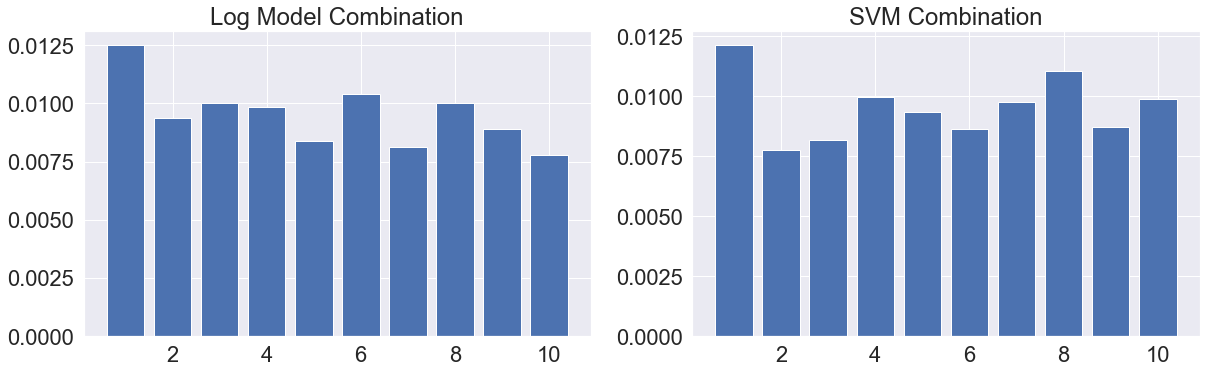

In [20]:
plot_quantile(asas)

We observe that the decile 10 bars in either of our combined factor models is lower compared to the decile 1, which is not a good sign for our model. We would have wanted something entirely opposite.

### Cumulative Returns of the Combined Factors

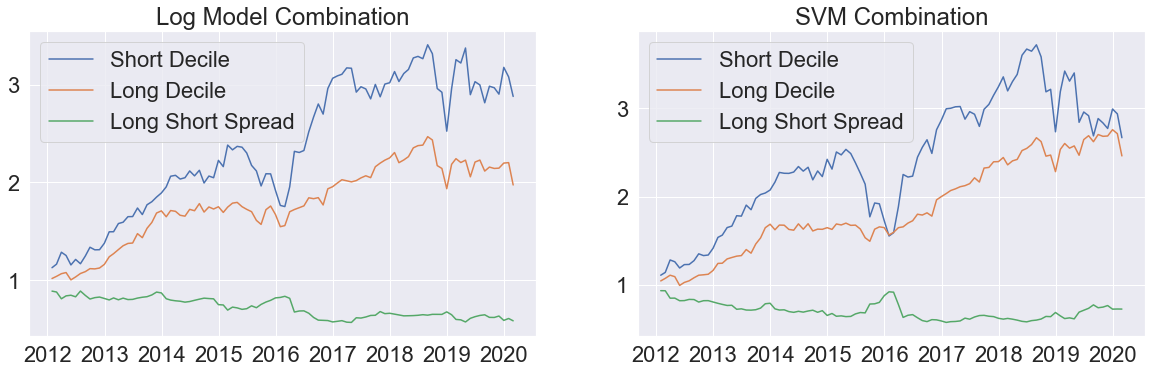

In [21]:
plot_returns(asas)

We see that our long short spreads based on the combined factors in either of the two constructs are very poor. The only silver lining is that we see that the long model look relative better on a risk adjusted basis in both constructs. So far our entire analysis indicates us towards a direction that we should build beta neutral long short spread for all factors, and we might see some promising value there. 

In [22]:
residual_formatted2, reg_beta2 = reg_LS_spread_vs_FFM5 (asas,famafrenchdata)

### Summary Stats of our combined factors

In [23]:
statsLS2, statsMkt = summaryStats(asas,famafrenchdata,residual_formatted2)
statsLS2[statsLS2.columns[0:12]].sort_values('Long Sharpe',ascending=False)

Long Ret  Long Std  Long Sharpe  Hit Rate  \
Factor                                                             
SVM Combination        0.564922  0.638719     0.884461  0.683673   
Log Model Combination  0.437656  0.702261     0.623209  0.663265   

                       Long Winner to Loser Ratio  Long Drawdown  Short Ret  \
Factor                                                                        
SVM Combination                          0.912588       0.607172   0.726923   
Log Model Combination                    0.826808       0.866772   0.749510   

                       Short Std  Short Sharpe  Short Hot Rate  \
Factor                                                           
SVM Combination         1.115871      0.651440        0.683673   
Log Model Combination   1.004402      0.746225        0.663265   

                       Short Winner To Loser Ratio  Short Drawdown  
Factor                                                              
SVM Combination                           1.051293        0.987018  
Log Model Combination                     1.275929        0.911729

In [24]:
statsLS2[statsLS2.columns[12:]].sort_values('Long Short Sharpe',ascending=False)

Long Short Ret  Long Short Std  Long Short Sharpe  \
Factor                                                                     
SVM Combination             -0.132878        0.780706          -0.170202   
Log Model Combination       -0.282731        0.650936          -0.434345   

                       Long Short Hit Rate  \
Factor                                       
SVM Combination                   0.510204   
Log Model Combination             0.489796   

                       Long Short Average Winner To Loser  \
Factor                                                      
SVM Combination                                  0.828931   
Log Model Combination                            0.725987   

                       Long Short Drawdown  Residual Ret  Residual Std  \
Factor                                                                   
SVM Combination                   0.996394     -0.018003      0.665874   
Log Model Combination             0.984902     -0.337404      0.576912   

                       Residual Sharpe  Residual Hit Rate  \
Factor                                                      
SVM Combination              -0.027037           0.520408   
Log Model Combination        -0.584845           0.418367   

                       Residual Average Winner To Loser  Residual Drawdown  
Factor                                                                      
SVM Combination                                0.901404           0.938184  
Log Model Combination                          0.889056           0.985672

We observe that for our SVM model the long leg has a higher risk adjusted return than our short leg. This means that if we to create a long short model in a market risk neutral construct we might achieve decent results. Since short leg has higher returns than the long leg, we observe that our long-short Sharpe Ratio is negative. We further compute the residuals of our long short strategies using Fama French Five Factors. Our volatility decreases only slightly, which means our strategy's returns are significantly different from the Fama French Five Factors. We clearly observe that our strategy has complete failed, when we ignore market risk premia in our long short spreads, and thus our next step in analysis would be to redesign rhe strategy and long short spreads from a beta neutral persepctive.

### Exposure of strategy's returns to Fama French Factors

In [25]:
residual_formatted2, reg_beta2 = reg_LS_spread_vs_FFM5 (asas,famafrenchdata)
reg_beta2*100

Mkt-RF       SMB       HML      RMW        CMA
Log Model Combination -0.100031 -0.270904 -0.366642  0.65081  0.0375791
SVM Combination       -0.381293 -0.336574 -0.331912  0.59527 -0.0796473

From the look of it it might appear as if exposure to market risk is not as high as has been stated throughout the analysis. However Fama French Factor themselves are not free from exposure to market risk, hence the true market risk exposure of our strategy is understated. Besides out strategy has a significant exposure to Fama French Profitability portfolios.

In [26]:
[means,stds] = mcsims(data)
statsLS, statsMkt = summaryStats(df1,famafrenchdata,residual_formatted)

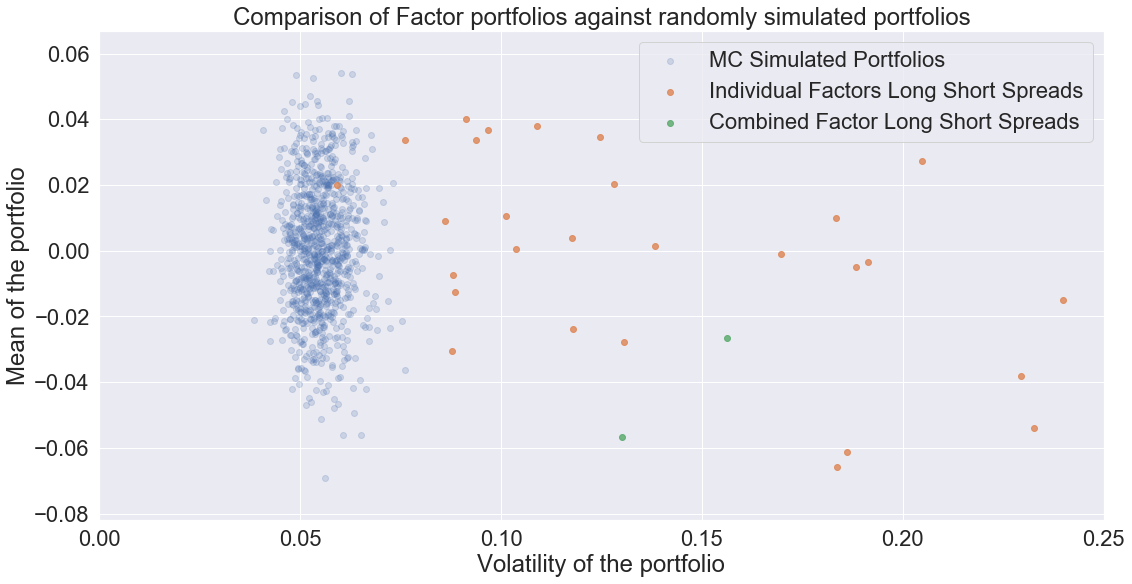

In [27]:
plot_mcsims(statsLS,statsLS2,means,stds)

We plotted mean and volatility of 1000 Monte Carlo simulated random portfolios from our universe which would go long and short on randomly selected tenth of a universe. At the same time we plotted mean and variance of long short portfolios of our individual factors as well as the combined factors. We clearly observe that our factors hardly have any edge in generating mean returns whereas volatility of the factor portfolios is clearly very high compared to the random portfolios. This happens because of extreme beta exposure of our factor portfolios which randomly simulated portfolios are unlikely to have. Additionally there is some factor risk premia as well which leads to much higher volatilites.

# Tactical Stock Selection Models (with Beta Neutrality)

The logistic regression model of this construct happens to be our chosen model. The recipe is exactly how it is described in the introduction. However, we will run the variant based on SVM alongside the Logistic Regression based model which also happens to be our eventual selected strategy.

In addition to the <a href = "#specs">specifications </a> for the non beta neutral models we have an extra specification i.e. period used to estimate beta for the tactical model, which we have selected as 48 months.

## Construction of Beta Neutral Long Short Spreads

In [28]:
df1_beta_new = beta_neutral(df1.copy())
df1_beta_new[df1_beta_new["Date"]>=pd.to_datetime("2011-12-31")]

Date                   Factor       1.0       2.0       3.0  \
735  2011-12-31       1 Month Volatility  0.013460  0.021643  0.004783   
736  2011-12-31            12-1 Momentum  0.038363  0.004563  0.015321   
737  2011-12-31         3 Month Momentum  0.022609  0.000527  0.016704   
738  2011-12-31       3 Month Volatility  0.010377  0.032769  0.008913   
739  2011-12-31         6 Month Momentum  0.023605  0.014894  0.004306   
...         ...                      ...       ...       ...       ...   
4495 2020-04-30   SN-Price To Book Ratio  0.178455  0.158059  0.113703   
4496 2020-04-30     SN-Price to Earnings  0.229266  0.084954  0.071751   
4497 2020-04-30         SN-Profit Margin  0.172546  0.142748  0.136348   
4498 2020-04-30  SN-Return on Investment  0.250836  0.148360  0.080585   
4499 2020-04-30        SN-Revenue Growth  0.155847  0.112070  0.112724   

           4.0       5.0       6.0       7.0       8.0       9.0      10.0  \
735   0.008778  0.016370  0.009002  0.012660  0.013859  0.012216  0.021035   
736   0.001614  0.004367  0.011262  0.019204  0.004234  0.030312  0.005026   
737   0.026487  0.008500  0.008189  0.012688  0.025445  0.005229  0.007569   
738   0.004887  0.014336 -0.004502  0.010054  0.009504  0.023497  0.023690   
739   0.013770  0.017778  0.006731  0.015605  0.012557  0.021918  0.002775   
...        ...       ...       ...       ...       ...       ...       ...   
4495  0.124119  0.124981  0.097683  0.160712  0.190348  0.237255  0.242835   
4496  0.131790  0.112985  0.185204  0.217490  0.167671  0.196011  0.233036   
4497  0.117317  0.105126  0.155997  0.200264  0.264816  0.188548  0.147679   
4498  0.082655  0.116018  0.148105  0.157078  0.191890  0.224236  0.231886   
4499  0.179993  0.247375  0.151420  0.134221  0.134779  0.190119  0.210884   

           Mkt      11.0     cov_1   var_mkt    cov_10    beta_1   beta_10  
735   0.013388  0.017933  0.010256  0.005920  0.002364  1.732501  0.399239  
736   0.013388 -0.016199  0.008695  0.005920  0.004811  1.468721  0.812619  
737   0.013388 -0.004131  0.010000  0.005920  0.005175  1.689102  0.874131  
738   0.013388  0.021658  0.010877  0.005920  0.002130  1.837389  0.359759  
739   0.013388 -0.007847  0.010560  0.005920  0.004752  1.783800  0.802736  
...        ...       ...       ...       ...       ...       ...       ...  
4495  0.163009  0.015711  0.003765  0.003728  0.004792  1.010025  1.285481  
4496  0.163009  0.022244  0.004812  0.003728  0.004424  1.290796  1.186779  
4497  0.163009  0.018640  0.004360  0.003728  0.003260  1.169499  0.874618  
4498  0.163009  0.039250  0.004882  0.003728  0.003749  1.309662  1.005793  
4499  0.163009  0.046350  0.003797  0.003728  0.004008  1.018464  1.075236  

[3030 rows x 19 columns]

For each of the 30 factors we have computed decile wise returns with Decile 10 being the most favorable decile and decile 1 being the least favorable one for every month end date. Decile 11.0 indicates the beta neutral long-short spread i.e. the Decile 10 - Decile 1 Return * (Beta Decile 10/Beta  Decile 1) of the specific factor, beta of decile 10 and decile 1 can be seen in the columns of the dataframes. We can obserev through the data frame that decile 10 beta is significantly smaller across the board than decile 1 beta, as we had expected earlier. 

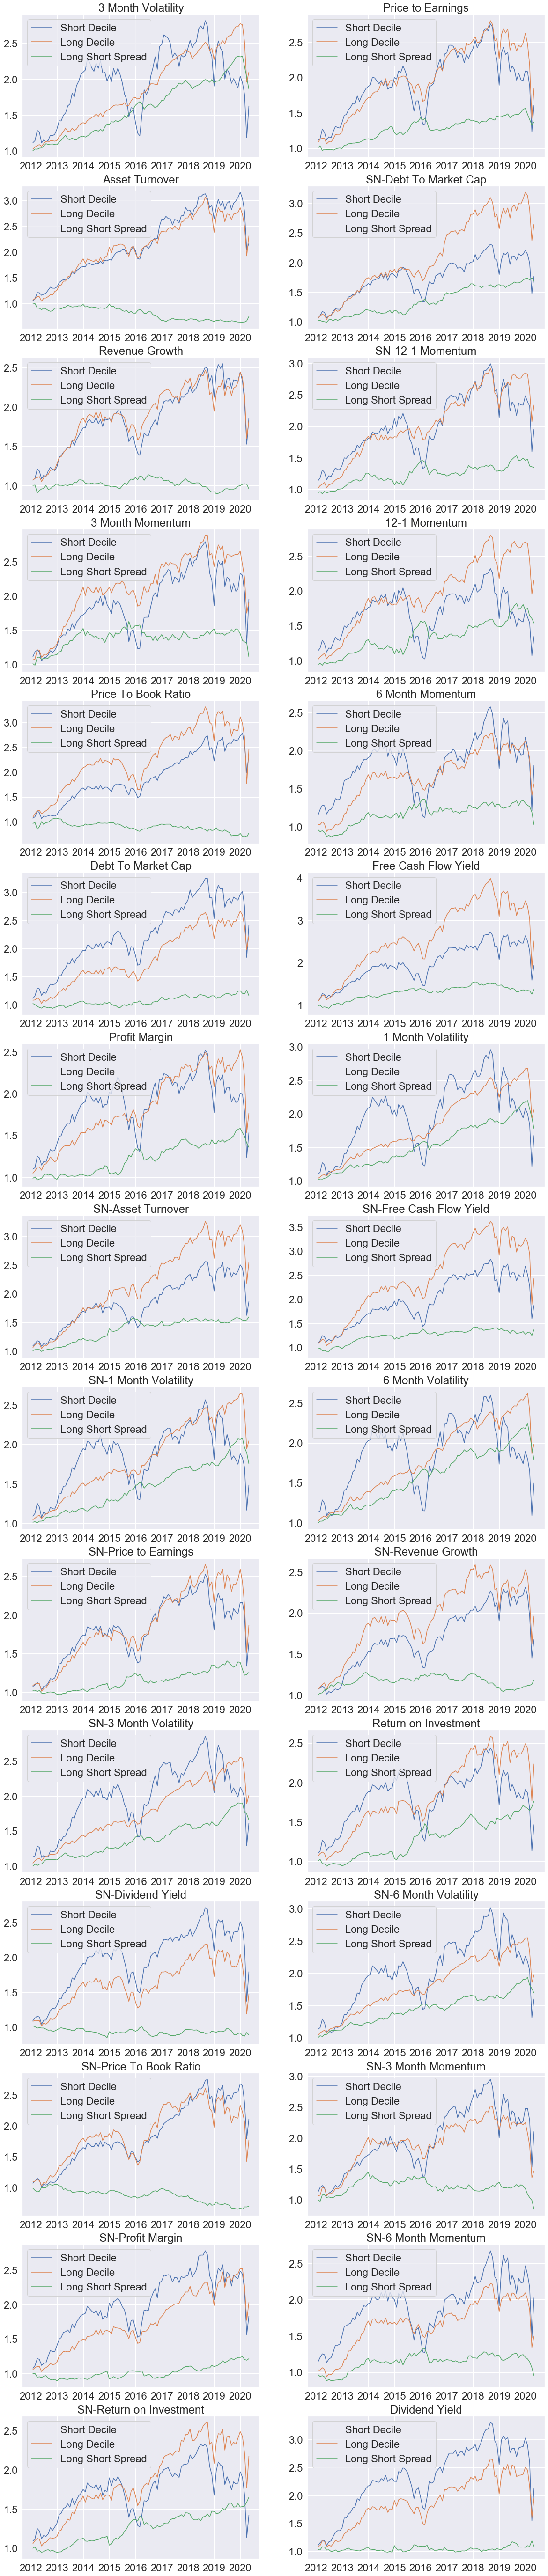

In [29]:
plot_returns(df1_beta_new)

Expectedly we see that a much larger number of factors have generayed positive long short spreads, as opposed to the analysis done without beta neutrality. Thus reducing position sizing on the short leg so as to make our long short spreads beta neutral, helps us generate positive long short spreads. Thus our hypothesis developed from previous analysis proved to be correct.

In [30]:
residual_formatted_bn, reg_beta_bn = reg_LS_spread_vs_FFM5 (df1_beta_new,famafrenchdata)

### Exposure of our factors beta neutral long short spreads to Fama French 5 Factors

In [31]:
reg_beta_bn*100

Mkt-RF         SMB          HML        RMW  \
1 Month Volatility         0.0995257  -0.0983582     0.126077   0.214951   
12-1 Momentum              0.0229555   0.0411851    -0.214567   0.382004   
3 Month Momentum           -0.131627    0.200346   0.00842799 -0.0245662   
3 Month Volatility          0.117441  -0.0642231    0.0932015   0.332584   
6 Month Momentum           -0.116166    0.248392 -0.000588089 -0.0996395   
6 Month Volatility          0.136385   -0.116198    0.0768354   0.249972   
Asset Turnover              0.279731 -0.00455692    -0.589411    0.43507   
Debt To Market Cap         -0.204852    0.339279  -0.00113262 -0.0144591   
Dividend Yield            -0.0401757   0.0936177    -0.167335  -0.196255   
Free Cash Flow Yield        0.123828   0.0917798     0.124448   0.183256   
Price To Book Ratio        -0.182031     0.45146     0.149668   0.375806   
Price to Earnings           0.129987   0.0515038      0.11817   0.343787   
Profit Margin           -0.000932447   0.0934812     0.174315   0.400506   
Return on Investment        0.158514  -0.0817656    -0.129613   0.464754   
Revenue Growth            -0.0892103   0.0831389   -0.0457875   0.345075   
SN-1 Month Volatility       0.125656   -0.181662   0.00192862   0.201357   
SN-12-1 Momentum           0.0740425  0.00551586    -0.240469   0.189998   
SN-3 Month Momentum        -0.090701    0.103253     0.170292  0.0030549   
SN-3 Month Volatility       0.167182    -0.18465   -0.0706733   0.197882   
SN-6 Month Momentum       -0.0589578    0.206059    0.0275635   0.110825   
SN-6 Month Volatility       0.217136    -0.23689   -0.0697457   0.161966   
SN-Asset Turnover          0.0454342  -0.0529372     0.179542 -0.0893609   
SN-Debt To Market Cap      -0.139497    0.229988    0.0929947  0.0675016   
SN-Dividend Yield         -0.0561217     0.12498   -0.0355102  0.0710751   
SN-Free Cash Flow Yield     0.173442  -0.0516083    0.0982675   0.189105   
SN-Price To Book Ratio     -0.192596    0.316576     0.109297   0.292213   
SN-Price to Earnings        0.098227  -0.0182918    0.0166384   0.288275   
SN-Profit Margin            0.153213   -0.186013   -0.0709723   0.522368   
SN-Return on Investment     0.137335  -0.0986392    -0.197218   0.324175   
SN-Revenue Growth          0.0717587   0.0204658    -0.102853     0.1177   

                                CMA  
1 Month Volatility        -0.111177  
12-1 Momentum             -0.224585  
3 Month Momentum          0.0324777  
3 Month Volatility       -0.0824604  
6 Month Momentum          -0.281074  
6 Month Volatility       -0.0959882  
Asset Turnover             0.642427  
Debt To Market Cap        -0.033658  
Dividend Yield           0.00961261  
Free Cash Flow Yield      -0.090506  
Price To Book Ratio        0.271236  
Price to Earnings         -0.235267  
Profit Margin             -0.443055  
Return on Investment      -0.276179  
Revenue Growth            -0.119682  
SN-1 Month Volatility     0.0315211  
SN-12-1 Momentum          -0.128392  
SN-3 Month Momentum     -0.00916925  
SN-3 Month Volatility     0.0655782  
SN-6 Month Momentum       -0.320578  
SN-6 Month Volatility     0.0618608  
SN-Asset Turnover         -0.203612  
SN-Debt To Market Cap     -0.120085  
SN-Dividend Yield          0.227508  
SN-Free Cash Flow Yield   -0.161223  
SN-Price To Book Ratio     0.176884  
SN-Price to Earnings     -0.0640197  
SN-Profit Margin           -0.29457  
SN-Return on Investment   -0.198423  
SN-Revenue Growth          0.104623

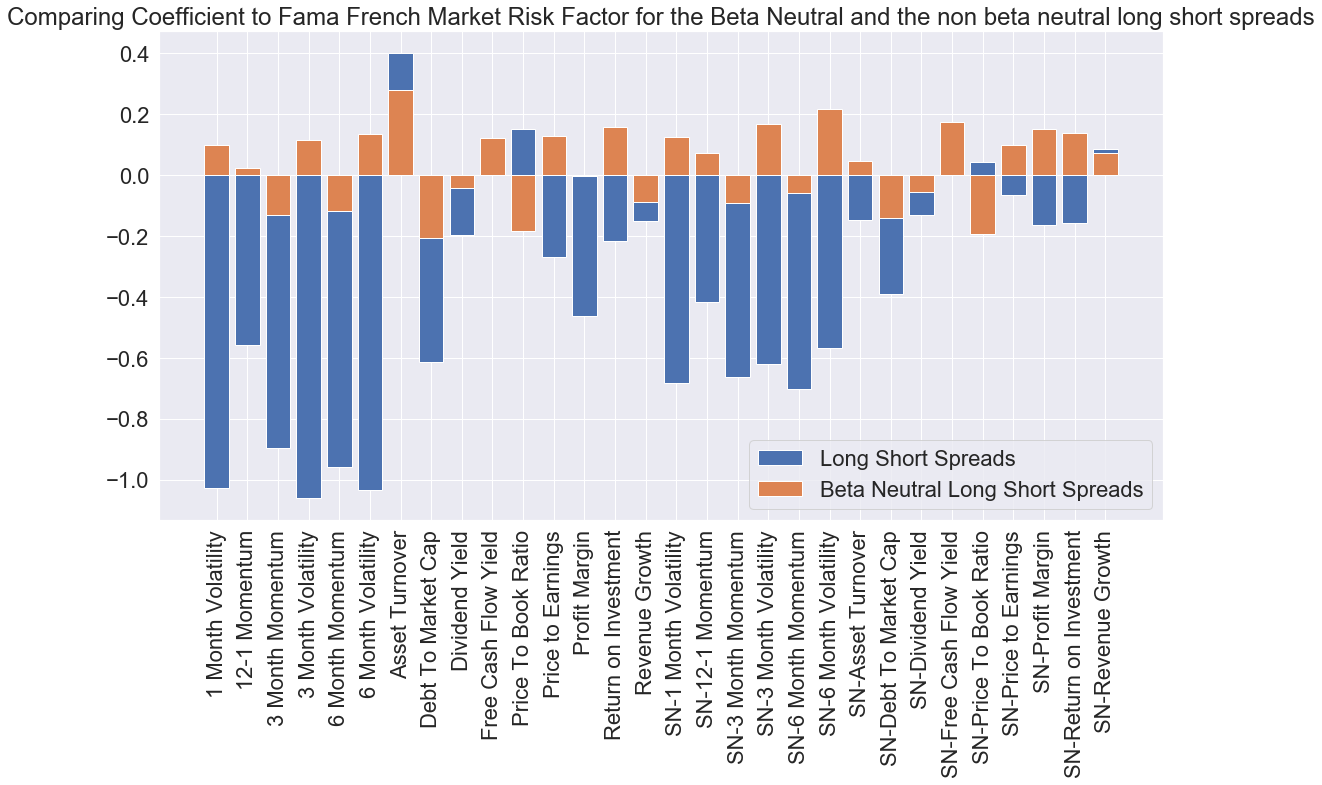

In [32]:
fig,ax=plt.subplots(figsize=(18, 9))
plt.bar(height = reg_beta["Mkt-RF"]*100,x = reg_beta.index,label = "Long Short Spreads")
plt.bar(height = reg_beta_bn["Mkt-RF"]*100,x = reg_beta_bn.index,label  = "Beta Neutral Long Short Spreads")
plt.legend()
plt.title("Comparing Coefficient to Fama French Market Risk Factor for the Beta Neutral and the non beta neutral long short spreads")
plt.xticks(rotation=90)
None

We observe that our construction of beta neutral spreads still possesses some exposure to market risk because we use trailing 48 months data to estimate the coefficients, however it is still substantially lower than long short spreads computed without neutrality. Thus we are somewhat able to achieve what we intended to. However this is an indication of risk in our strategy that our beta hedging although is effective but still imperfect.

In [33]:
#To create table of probabilities; df_merge (full period) and df_merge_test for double checking alignment of dates
train_period = 48
num_features = 5
prob_table_2 = create_prob_table_bn (df1_beta_new,train_period,df_indicators_delta_short,df_indicators_short,num_features)

In [34]:
prob_table_2[prob_table_2["Date"] == "2020-02-29"].sort_values("Log_Prob",ascending = False)

Date                   Factor  SVM_Prob  Log_Prob
2771  2020-02-29         SN-Profit Margin  0.691651  0.860168
1583  2020-02-29    SN-1 Month Volatility  0.754451  0.791333
1385  2020-02-29     Return on Investment  0.614726  0.779108
197   2020-02-29            12-1 Momentum  0.612248  0.756511
1286  2020-02-29            Profit Margin  0.572960  0.687443
2078  2020-02-29    SN-6 Month Volatility  0.665929  0.676625
1880  2020-02-29    SN-3 Month Volatility  0.692771  0.670836
1979  2020-02-29      SN-6 Month Momentum  0.650917  0.667073
2474  2020-02-29  SN-Free Cash Flow Yield  0.573047  0.626413
2375  2020-02-29        SN-Dividend Yield  0.144063  0.624895
2276  2020-02-29    SN-Debt To Market Cap  0.666802  0.624688
98    2020-02-29       1 Month Volatility  0.742818  0.603051
2969  2020-02-29        SN-Revenue Growth  0.334917  0.583527
494   2020-02-29         6 Month Momentum  0.565220  0.577271
890   2020-02-29           Dividend Yield  0.557015  0.574163
296   2020-02-29         3 Month Momentum  0.564197  0.548478
2870  2020-02-29  SN-Return on Investment  0.561303  0.539015
1682  2020-02-29         SN-12-1 Momentum  0.643515  0.525443
2672  2020-02-29     SN-Price to Earnings  0.553132  0.524524
989   2020-02-29     Free Cash Flow Yield  0.521925  0.521732
2177  2020-02-29        SN-Asset Turnover  0.548330  0.505302
1187  2020-02-29        Price to Earnings  0.536775  0.504406
395   2020-02-29       3 Month Volatility  0.758515  0.494836
791   2020-02-29       Debt To Market Cap  0.552030  0.486513
593   2020-02-29       6 Month Volatility  0.691040  0.480565
1781  2020-02-29      SN-3 Month Momentum  0.474370  0.473399
1088  2020-02-29      Price To Book Ratio  0.440530  0.427782
1484  2020-02-29           Revenue Growth  0.431410  0.380915
692   2020-02-29           Asset Turnover  0.453161  0.350061
2573  2020-02-29   SN-Price To Book Ratio  0.388529  0.320233

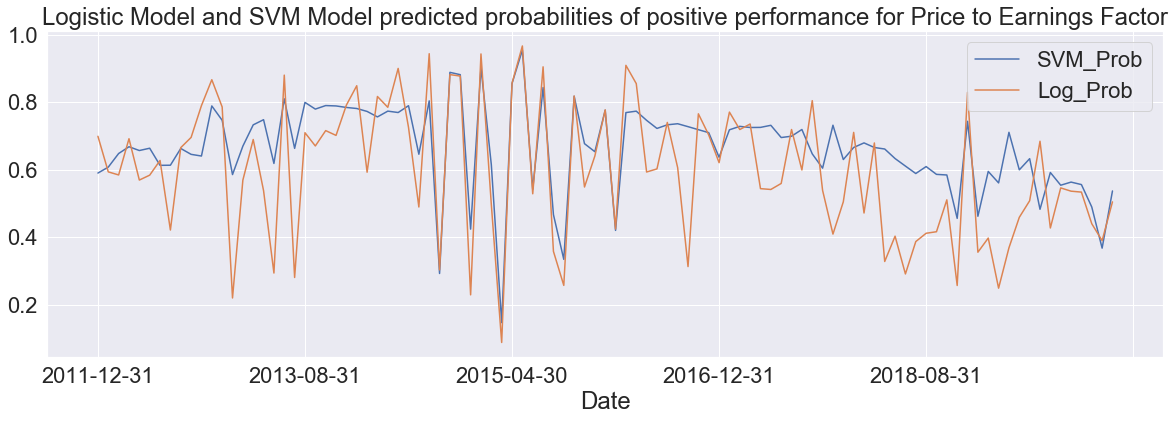

In [35]:
EY_bn = prob_table_2[prob_table_2["Factor"] == "Price to Earnings"]
EY_bn = EY_bn.set_index("Date")
EY_bn.plot(figsize = (20,6),title = "Logistic Model and SVM Model predicted probabilities of positive performance for Price to Earnings Factor")

In this construct as well, we observe the same pattern, Logistic Model probabilities are more adaptive than SVM probabilities. 

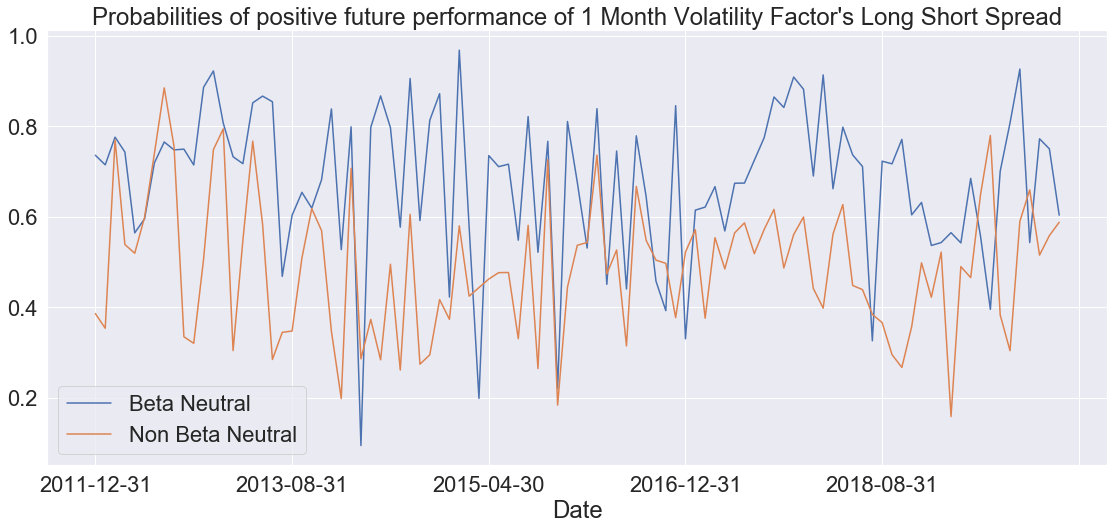

In [36]:
mv_bn = prob_table_2[prob_table_2["Factor"] == "1 Month Volatility"]
mv_bn = mv_bn.set_index("Date")

mv = prob_table[prob_table["Factor"] == "1 Month Volatility"]
mv = mv.set_index("Date")

mvcomb = mv_bn.merge(mv,left_on="Date",right_on="Date")
mvcomb = mvcomb[["Log_Prob_x","Log_Prob_y"]] 
mvcomb.columns = ["Beta Neutral","Non Beta Neutral"]
mvcomb[["Beta Neutral","Non Beta Neutral"]].plot(figsize = (19,8),title = "Probabilities of positive future performance of 1 Month Volatility Factor's Long Short Spread")

We have plotted the probabilities of positive performance of the 1 month volatility factor's in the following months across the entire timeline by the logistic regression model using (i) Beta neutral long short spreads and (ii) Non beta neutral long short spreads. We observe that the probabilities of beta neutral spreads are consistetly higher than that of the non beta neutral spread, because in the beta neutral spread our short decile is consistently penalized. Thus this construct is more effective in capturing 1 month volatility factor's true risk premia.  

In [37]:
SVMmodel_bn,Logmodel_bn,corr_bn = best_fac_beta(prob_table_2,df1_beta_new)

In [38]:
Logmodel_bn[Logmodel_bn["Date"] == "2020-02-29"]

Date                 Factor  Log_Prob  Log_Rank
2771  2020-02-29       SN-Profit Margin  0.860168       1.0
1583  2020-02-29  SN-1 Month Volatility  0.791333       2.0
1385  2020-02-29   Return on Investment  0.779108       3.0
197   2020-02-29          12-1 Momentum  0.756511       4.0

We pick the 4 best factors for both model with the highest probabilities of positive performance, i.e. their beta neutrak long short spreads to have the highest probabilities of positive performance in the following month. In doing so, we ensure that none of the factor's beta neutral long short spreads had a correlation greater than 0.8

In [39]:
corr_bn[(corr_bn["Factor"].isin(['Return on Investment','SN-1 Month Volatility','SN-Profit Margin','12-1 Momentum'])) & \
     (corr_bn["Date"] == "2020-02-29")][["Date","Factor",'Return on Investment','SN-1 Month Volatility','SN-Profit Margin','12-1 Momentum']]

Date                 Factor  Return on Investment  \
1  2020-02-29          12-1 Momentum              0.338243   
13 2020-02-29   Return on Investment              1.000000   
15 2020-02-29  SN-1 Month Volatility              0.626342   
27 2020-02-29       SN-Profit Margin              0.670730   

    SN-1 Month Volatility  SN-Profit Margin  12-1 Momentum  
1                0.588160          0.423657       1.000000  
13               0.626342          0.670730       0.338243  
15               1.000000          0.709160       0.588160  
27               0.709160          1.000000       0.423657

We can observe the trailing 48 month correlation matrix of the best 4 selected factors according to the Logistic Regression model, none of the 4 factors beta neutral long short spreads had a correlation greater than 0.8.

### Backtesting Strategy Returns

In [40]:
asas_bn = combinedBacktest_BN(data.copy(),SVMmodel_bn,Logmodel_bn)

### Decile wise returns of our combined factor

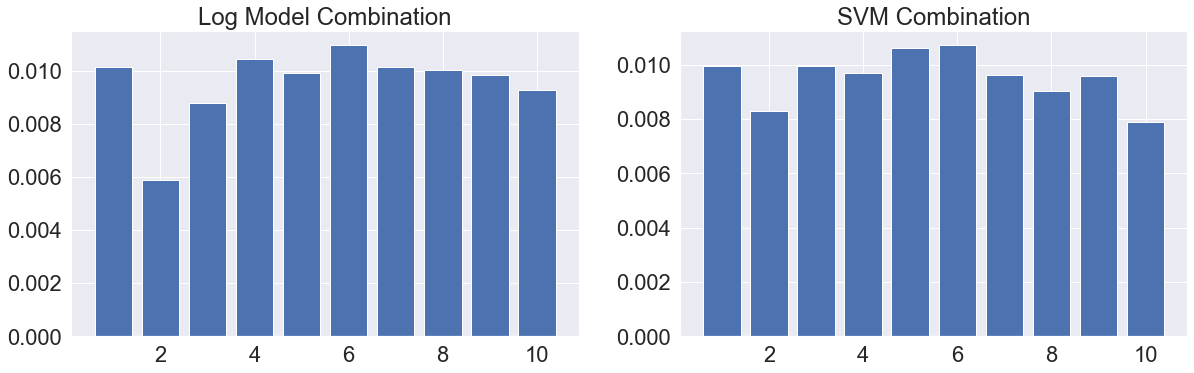

In [41]:
plot_quantile(asas_bn)

We observe that the decile 10 bars in either of our combined factor models is still lower compared to the decile 1, but not as low as it was in the previous analysis. Moreover, we will further adjust these returns by taking beta neutral positions in our eventual strategy.

### Cumulative Returns of the Combined Factors

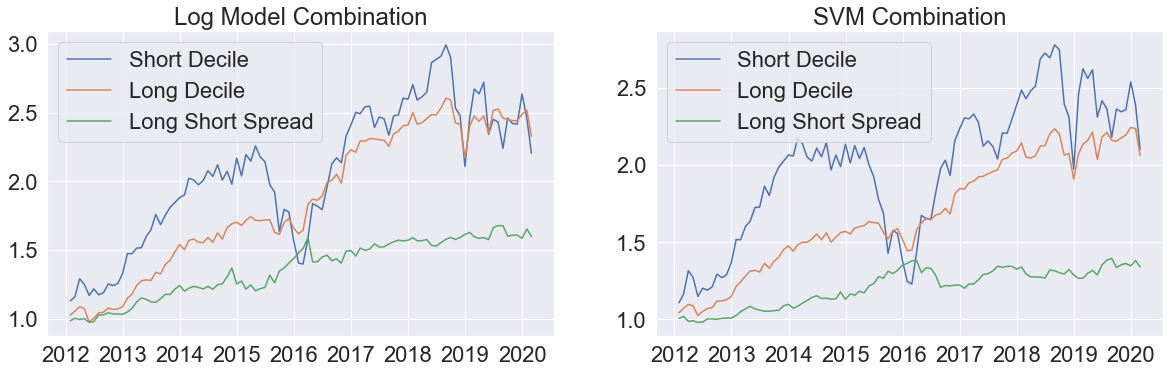

In [42]:
plot_returns(asas_bn)

We observe that the beta adjusted long short spread of our combined factors in this framework generate strong positive returns with small drawdowns and not very high volatility.

In [43]:
residual_formatted2_bn, reg_beta2_bn = reg_LS_spread_vs_FFM5 (asas_bn,famafrenchdata)

### Summary Stats of our combined factors

In [44]:
statsLS2_bn, statsMkt_bn = summaryStats(asas_bn,famafrenchdata,residual_formatted2_bn)
statsLS2_bn[statsLS2_bn.columns[0:12]].sort_values('Long Sharpe',ascending=False)

Long Ret  Long Std  Long Sharpe  Hit Rate  \
Factor                                                             
Log Model Combination  0.526874  0.613193     0.859231  0.612245   
SVM Combination        0.444270  0.533156     0.833283  0.724490   

                       Long Winner to Loser Ratio  Long Drawdown  Short Ret  \
Factor                                                                        
Log Model Combination                    1.271897       0.688803   0.607524   
SVM Combination                          0.729539       0.616272   0.595874   

                       Short Std  Short Sharpe  Short Hot Rate  \
Factor                                                           
Log Model Combination   1.108248      0.548184        0.612245   
SVM Combination         1.193156      0.499410        0.724490   

                       Short Winner To Loser Ratio  Short Drawdown  
Factor                                                              
Log Model Combination                     1.186990        0.983009  
SVM Combination                           1.291704        0.990591

In [45]:
statsLS2_bn[statsLS2_bn.columns[12:]].sort_values('Long Short Sharpe',ascending=False)

Long Short Ret  Long Short Std  Long Short Sharpe  \
Factor                                                                     
Log Model Combination        0.311147        0.488198           0.637338   
SVM Combination              0.191678        0.356247           0.538049   

                       Long Short Hit Rate  \
Factor                                       
Log Model Combination             0.632653   
SVM Combination                   0.602041   

                       Long Short Average Winner To Loser  \
Factor                                                      
Log Model Combination                            0.967564   
SVM Combination                                  0.996778   

                       Long Short Drawdown  Residual Ret  Residual Std  \
Factor                                                                   
Log Model Combination             0.575471      0.076499      0.442097   
SVM Combination                   0.555270     -0.010551      0.311284   

                       Residual Sharpe  Residual Hit Rate  \
Factor                                                      
Log Model Combination         0.173038           0.500000   
SVM Combination              -0.033894           0.561224   

                       Residual Average Winner To Loser  Residual Drawdown  
Factor                                                                      
Log Model Combination                          1.144630           0.751104  
SVM Combination                                0.762466           0.730005

We observe that long decile has a much superior Sharpe Ratio than short decile, with the difference being even higher than in our analysis on non beta neutral long short spreads. Furthermore since we reduce the sizing of short leg, we get decent Sharpe Ratios on the long short spread. Logisitic Regression model generates a better long short Sharpe ratio than the SVM combination. Logistic Regression model is able to generate some positive information ratio using Fama French Five Factors as the benchmark. 

### Exposure of strategy's returns to Fama French Factors


In [46]:
residual_formatted2_bn, reg_beta2_bn = reg_LS_spread_vs_FFM5 (asas_bn,famafrenchdata)
reg_beta2_bn*100

Mkt-RF        SMB       HML       RMW       CMA
Log Model Combination  0.246085 -0.0309434 -0.324136  0.528995  0.144086
SVM Combination        0.182904  -0.191225 -0.215653  0.266141 -0.041104

We observe that there is strong distinction in the logistic model's and SVM based strategy in their exposure to the profitability (Robust Minus Weak) factor of the Fama French. Even though we attempted to make our portfolios market risk neutral, we still have some exposure to market risk. 

### Comparing the mean variance frontier of beta neutral and non beta neutral strategies

In [47]:
[means,stds] = bn_mcsims(data)
statsLS_bn, statsMkt_bn = summaryStats(df1_beta_new,famafrenchdata,residual_formatted_bn)

#### Mean Variance Frontier of the Beta Neutral Framework

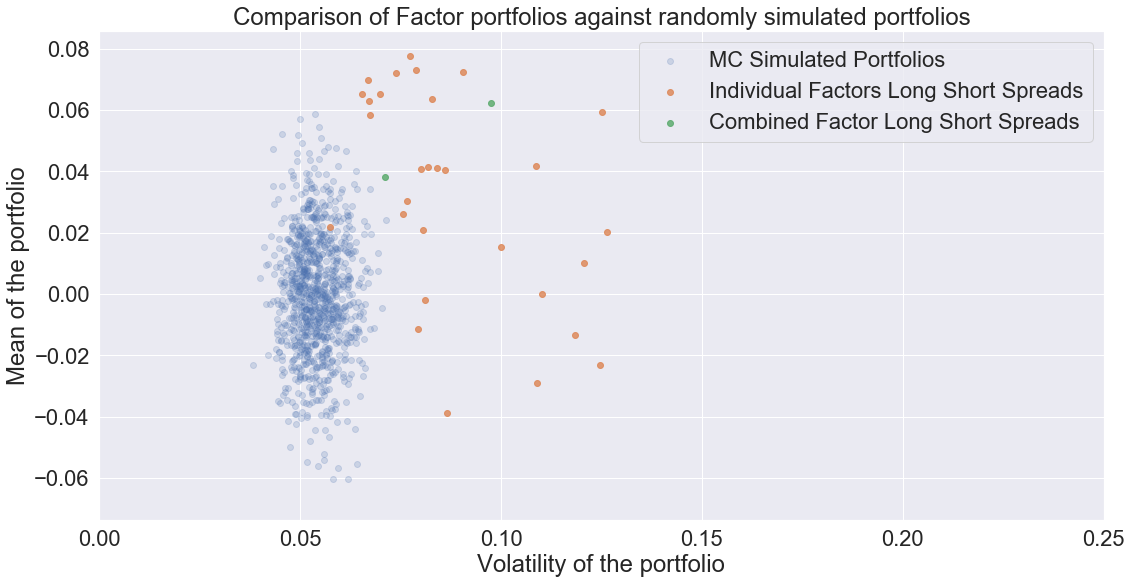

In [48]:
plot_mcsims(statsLS_bn,statsLS2_bn,means,stds)

#### Recalling the results for the non beta neutral framework

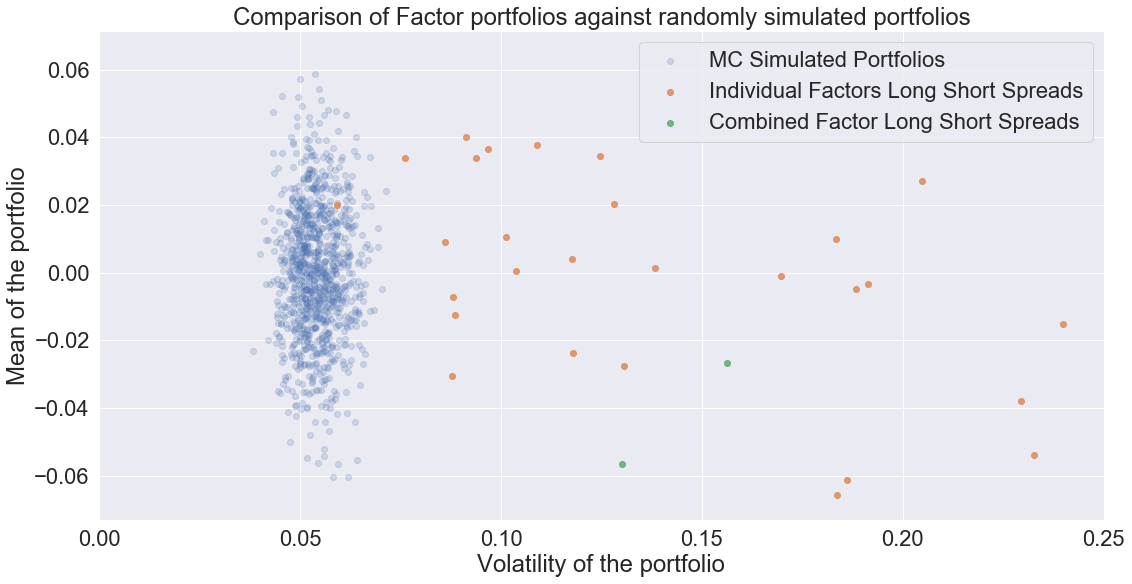

In [49]:
plot_mcsims(statsLS,statsLS2,means,stds)

We have recalled the Monte Carlo chart from the non beta neutral section to compare it against the beta neutral framework. The top chart is the beta neutral risk frontier whereas the bottom chart is the non beta neutral strategies' frontier. The blue dots in the frontiers represent Monte Carlo randomly simulated portfolios where we take a long and short positions in randomly selected tenth of a universe. We observe that the volatility of the factor portfolios is far higher in the bottom charts, compared to the top chart. This happens because of the excessive market risk premium in the factor portfolios for the bottom charts. Returns of the factor portfolio are far higher in the top chart than in the bottom one. Although we do observe volatility of the portfolios in the top chart are also higher than random portfolios because of our imperfect beta hedging and some exposure to factor risk premia. 

In [50]:
res_format, beta,alp = reg_LS_spread_vs_FFM5_alp(asas_bn,famafrenchdata)
beta

Mkt-RF          SMB         HML         RMW  \
Log Model Combination  0.00246085 -0.000309434 -0.00324136  0.00528995   
SVM Combination        0.00182904  -0.00191225 -0.00215653  0.00266141   

                              CMA  
Log Model Combination  0.00144086  
SVM Combination       -0.00041104

In [51]:
df_plt,cal_r = results(asas_bn,famafrenchdata,"Log Model Combination",beta,alp)

In [53]:
cal_r

Fama French  Strategy  Excess Return
Date                                      
2012    -0.000077  0.032846       0.032922
2013     0.052884  0.189382       0.136498
2014     0.037368  0.015400      -0.021968
2015     0.026569  0.146998       0.120430
2016    -0.001683  0.050390       0.052073
2017     0.103737  0.050850      -0.052887
2018     0.011628  0.028112       0.016485
2019     0.113037 -0.014559      -0.127596
2020     0.051293  0.008788       0.016560

When we construct a Fama French 5 Factor Portfolio based on the same risk profile of our strategy as the benchmark, as in we take the weights in each of the factors as the beta as suggested by the linear regression on them, we observe our strategy outperforms the portfolio in 6 of the 9 years in our backtest period.

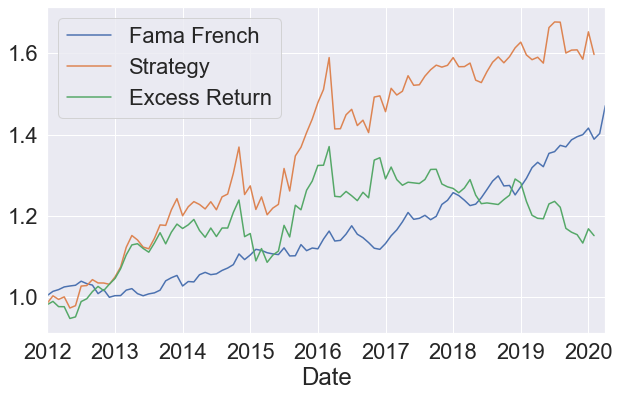

In [54]:
(1+df_plt.set_index('Date')).cumprod().plot()
plt.gcf().set_size_inches(10, 6)

We observe that our Logistic Model based strategy outperforms the benchmark based on Fama French 5 Factor Portfolios in terms of cumulative returns, however we do see that our strategies has higher drawdowns and volatility compared to the benchmark.

# Stress Testing and Additional Variants 

## 1. Beta neutral framework of the combined factors based on trailing 24 month window rather than 48   

In this setup we have computed the beta neutral spread of our combined factors based on beta computed at a trailing 24 month window. We hypothesize that this exercise might lead to a superior beta hedging, because it will be based on more recent sample. However our individual factor's long short spreads which we feed to the regression/classification models are still based on 48 month windows. 

In [89]:
asas_bn24 = pd.read_csv("beta_neutral_beta24_v2.csv",index_col=None)
asas_bn24.columns = ["Date","Factor",1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,'Mkt', 'beta_1', 'beta_10', 11.0]
asas_bn24 = asas_bn24[asas_bn24['Factor'].isin(["Log Model Combination","SVM Combination"])]
asas_bn24["Date"] = pd.to_datetime(asas_bn24["Date"])

### Summary Stats of the strategy


In [90]:
residual_formatted2_bn24, reg_beta2_bn24 = reg_LS_spread_vs_FFM5 (asas_bn24,famafrenchdata)
statsLS2_bn24, statsMkt_bn24 = summaryStats(asas_bn24,famafrenchdata,residual_formatted2_bn24)
statsLS2_bn24[statsLS2_bn24.columns[0:12]].sort_values('Long Sharpe',ascending=False)


Long Ret  Long Std  Long Sharpe  Hit Rate  \
Factor                                                             
Log Model Combination  0.526874  0.613193     0.859231  0.612245   
SVM Combination        0.444270  0.533156     0.833283  0.724490   

                       Long Winner to Loser Ratio  Long Drawdown  Short Ret  \
Factor                                                                        
Log Model Combination                    1.271897       0.688803   0.607524   
SVM Combination                          0.729539       0.616272   0.595874   

                       Short Std  Short Sharpe  Short Hot Rate  \
Factor                                                           
Log Model Combination   1.108248      0.548184        0.612245   
SVM Combination         1.193156      0.499410        0.724490   

                       Short Winner To Loser Ratio  Short Drawdown  
Factor                                                              
Log Model Combination                     1.186990        0.983009  
SVM Combination                           1.291704        0.990591

In [91]:
statsLS2_bn24[statsLS2_bn24.columns[12:]].sort_values('Long Short Sharpe',ascending=False)

Long Short Ret  Long Short Std  Long Short Sharpe  \
Factor                                                                     
Log Model Combination        0.368373        0.511301           0.720463   
SVM Combination              0.241518        0.366980           0.658121   

                       Long Short Hit Rate  \
Factor                                       
Log Model Combination             0.653061   
SVM Combination                   0.622449   

                       Long Short Average Winner To Loser  \
Factor                                                      
Log Model Combination                            0.951087   
SVM Combination                                  0.993013   

                       Long Short Drawdown  Residual Ret  Residual Std  \
Factor                                                                   
Log Model Combination             0.654437      0.175369      0.479404   
SVM Combination                   0.488860      0.067409      0.330575   

                       Residual Sharpe  Residual Hit Rate  \
Factor                                                      
Log Model Combination         0.365806           0.551020   
SVM Combination               0.203916           0.571429   

                       Residual Average Winner To Loser  Residual Drawdown  
Factor                                                                      
Log Model Combination                          1.094190           0.641605  
SVM Combination                                0.873251           0.557161

### Comparing Strategy's (immediately below) exposure to Fama French Factors to that of the strategy based on the original construct (further below)

In [94]:
reg_beta2_bn24*100

Mkt-RF       SMB       HML       RMW        CMA
Log Model Combination  0.194684 -0.059225 -0.265916  0.492783   0.184838
SVM Combination        0.142933 -0.211147 -0.198886  0.241226 -0.0120334

In [95]:
reg_beta2_bn*100

Mkt-RF        SMB       HML       RMW       CMA
Log Model Combination  0.246085 -0.0309434 -0.324136  0.528995  0.144086
SVM Combination        0.182904  -0.191225 -0.215653  0.266141 -0.041104

<b> Comments </b>

We observe that the long short spreads improve as we reduce the period of beta estimation to 24 months.
Furthermore, true to our hypothesis, we see that the coefficient to the market risk premia decreases, thus pointing that our beta hedging improves as we reduce the beta estimation period. Rest of the exposures are not significantly different.

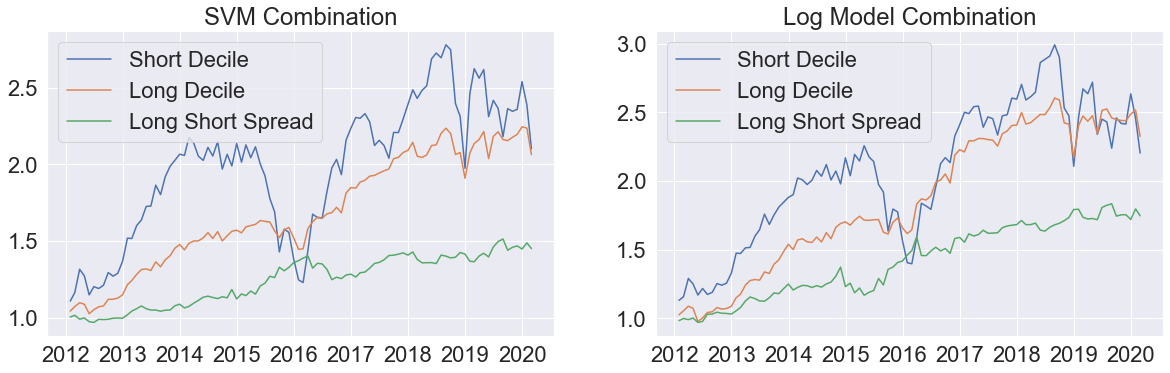

In [96]:
plot_returns(asas_bn24)

## 2. SVM and Logistic Models based beta neutral strategy based on best 2 Factors instead of best 4

In [74]:
asas_bntop2 = pd.read_csv("beta_neutral_top2.csv",index_col=None)
asas_bntop2.columns = ["Date","Factor",1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,'Mkt', 'beta_1', 'beta_10', 11.0]
asas_bntop2 = asas_bntop2[asas_bntop2['Factor'].isin(["Log Model Combination","SVM Combination"])]
asas_bntop2["Date"] = pd.to_datetime(asas_bntop2["Date"])

### Summary Stats of the strategy

In [75]:
residual_formatted2_bntop2, reg_beta2_bntop2 = reg_LS_spread_vs_FFM5 (asas_bntop2,famafrenchdata)
statsLS2_bntop2, statsMkt_top2 = summaryStats(asas_bntop2,famafrenchdata,residual_formatted2_bntop2)
statsLS2_bntop2[statsLS2_bntop2.columns[0:12]].sort_values('Long Sharpe',ascending=False)


Long Ret  Long Std  Long Sharpe  Hit Rate  \
Factor                                                             
SVM Combination        0.532389  0.552274     0.963995  0.693878   
Log Model Combination  0.479895  0.606689     0.791006  0.653061   

                       Long Winner to Loser Ratio  Long Drawdown  Short Ret  \
Factor                                                                        
SVM Combination                          0.938847       0.705612   0.525183   
Log Model Combination                    1.037648       0.706729   0.633968   

                       Short Std  Short Sharpe  Short Hot Rate  \
Factor                                                           
SVM Combination         1.149478      0.456888        0.693878   
Log Model Combination   1.081956      0.585946        0.653061   

                       Short Winner To Loser Ratio  Short Drawdown  
Factor                                                              
SVM Combination                           1.160155        0.992932  
Log Model Combination                     1.215081        0.977936

In [76]:
statsLS2_bntop2[statsLS2_bntop2.columns[12:]].sort_values('Long Short Sharpe',ascending=False)

Long Short Ret  Long Short Std  Long Short Sharpe  \
Factor                                                                     
SVM Combination              0.283572        0.423528           0.669548   
Log Model Combination        0.221384        0.553598           0.399900   

                       Long Short Hit Rate  \
Factor                                       
SVM Combination                   0.632653   
Log Model Combination             0.551020   

                       Long Short Average Winner To Loser  \
Factor                                                      
SVM Combination                                  0.957979   
Log Model Combination                            1.136641   

                       Long Short Drawdown  Residual Ret  Residual Std  \
Factor                                                                   
SVM Combination                   0.579198      0.140919      0.399237   
Log Model Combination             0.700039      0.056752      0.529186   

                       Residual Sharpe  Residual Hit Rate  \
Factor                                                      
SVM Combination               0.352970           0.561224   
Log Model Combination         0.107244           0.479592   

                       Residual Average Winner To Loser  Residual Drawdown  
Factor                                                                      
SVM Combination                                1.030090           0.559566  
Log Model Combination                          1.181173           0.806137

### Comparing Strategy's (immediately below) exposure to Fama French Factors to that of the strategy based on 4 factors (further below)

In [78]:
reg_beta2_bntop2*100

Mkt-RF        SMB       HML        RMW        CMA
Log Model Combination  0.149639 -0.0733254 -0.140547   0.493354 -0.0772875
SVM Combination        0.111468  -0.190857 -0.329215  0.0588157   0.382265

In [79]:
reg_beta2_bn*100

Mkt-RF        SMB       HML       RMW       CMA
Log Model Combination  0.246085 -0.0309434 -0.324136  0.528995  0.144086
SVM Combination        0.182904  -0.191225 -0.215653  0.266141 -0.041104

<b> Comments </b>

We observe that the long short spreads of the 2 factor based models are not very different from those based on 4 models. While the SVM model has improved slightly, Logistic Model has slightly worsened.
Furthermore, we observe that there are some changes in the Fama French exposures when we reduce number of factors to build our combined factor on, to 2, SVM combination's exposure to Profitability Portfolio (RMW) has increased significantly whereas to Investment Portfolios (CMA) has decreased significantly. For logistic model, exposures to Value (HML) portfolio and investment portfolios have changed distinctly.

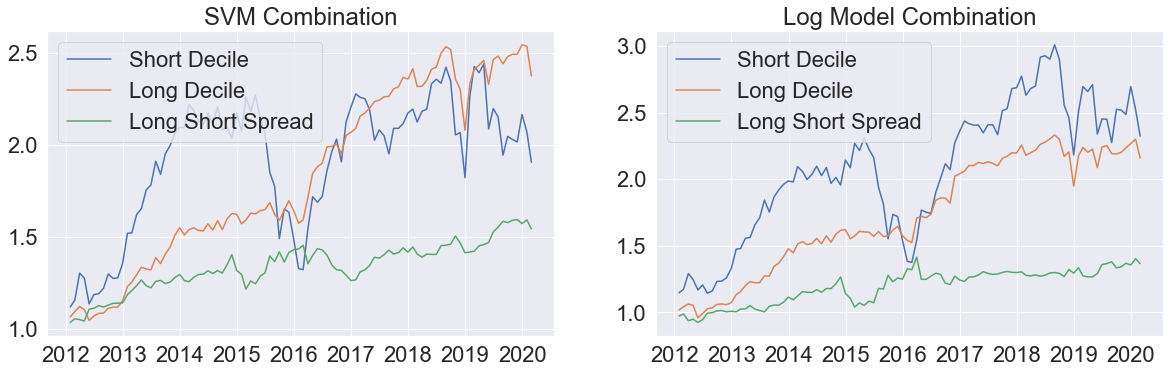

In [77]:
plot_returns(asas_bntop2)

For the model based on top 2 factors we observe that SVM model has strengthened and Logistic Model has worsened, albeit not with much differences. We had anticipated that a factor based on combination of 2 best factors instead of 4 would probably generate higher returns and higher standard deviation than our selected model, however we do not observe that to be the case.

## 3. SVM and Logistic Models based on a reduced training period of 24 month 

Here we have reduced the training period which we used to build our logistic regression and SVM models used towards finding best factors to 24. While our prediction will become more adaptive but will be highly sensitive to outliers because of a much smaller data size. We here analyze the variation in strategy results.

In [80]:
asas_bn24t = pd.read_csv("beta_neutral_MLtrain24.csv",index_col=None)
asas_bn24t.columns = ["Date","Factor",1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,'Mkt', 'beta_1', 'beta_10', 11.0]
asas_bn24t = asas_bn24t[asas_bn24t['Factor'].isin(["Log Model Combination","SVM Combination"])]
asas_bn24t["Date"] = pd.to_datetime(asas_bn24t["Date"])

### Summary Stats of the strategy

In [81]:
residual_formatted2_bn24t, reg_beta2_bn24t = reg_LS_spread_vs_FFM5 (asas_bn24t,famafrenchdata)
statsLS2_bn24t, statsMkt_bn24t = summaryStats(asas_bn24t,famafrenchdata,residual_formatted2_bn24t)
statsLS2_bn24t[statsLS2_bn24t.columns[0:12]].sort_values('Long Sharpe',ascending=False)


Long Ret  Long Std  Long Sharpe  Hit Rate  \
Factor                                                             
Log Model Combination   0.47102  0.592267     0.795283  0.653061   
SVM Combination         0.41707  0.538064     0.775131  0.663265   

                       Long Winner to Loser Ratio  Long Drawdown  Short Ret  \
Factor                                                                        
Log Model Combination                    0.993622       0.675822   0.553690   
SVM Combination                          0.924808       0.654462   0.487748   

                       Short Std  Short Sharpe  Short Hot Rate  \
Factor                                                           
Log Model Combination   1.080456      0.512459        0.653061   
SVM Combination         1.083903      0.449992        0.663265   

                       Short Winner To Loser Ratio  Short Drawdown  
Factor                                                              
Log Model Combination                     1.071792        0.983008  
SVM Combination                           1.061436        0.981614

In [82]:
statsLS2_bn24t[statsLS2_bn24t.columns[12:]].sort_values('Long Short Sharpe',ascending=False)

Long Short Ret  Long Short Std  Long Short Sharpe  \
Factor                                                                     
Log Model Combination        0.235742        0.429308           0.549122   
SVM Combination              0.193278        0.402310           0.480419   

                       Long Short Hit Rate  \
Factor                                       
Log Model Combination             0.622449   
SVM Combination                   0.622449   

                       Long Short Average Winner To Loser  \
Factor                                                      
Log Model Combination                            0.919885   
SVM Combination                                  0.877841   

                       Long Short Drawdown  Residual Ret  Residual Std  \
Factor                                                                   
Log Model Combination             0.556539      0.046090      0.410226   
SVM Combination                   0.652161      0.026939      0.382233   

                       Residual Sharpe  Residual Hit Rate  \
Factor                                                      
Log Model Combination         0.112352           0.571429   
SVM Combination               0.070479           0.540816   

                       Residual Average Winner To Loser  Residual Drawdown  
Factor                                                                      
Log Model Combination                          0.819095           0.777163  
SVM Combination                                0.895597           0.797060

### Comparing Strategy's (immediately below) exposure to Fama French Factors to that of the strategy based on 48 month training size (further below)

In [83]:
reg_beta2_bn24t*100

Mkt-RF        SMB       HML        RMW       CMA
Log Model Combination  0.221571  -0.139845 -0.130292  0.0372539  0.195734
SVM Combination        0.178067 -0.0434324  -0.30533  0.0679236  0.392167

In [84]:
reg_beta2_bn*100

Mkt-RF        SMB       HML       RMW       CMA
Log Model Combination  0.246085 -0.0309434 -0.324136  0.528995  0.144086
SVM Combination        0.182904  -0.191225 -0.215653  0.266141 -0.041104

<b> Comments </b>

We observe that the long short spreads of the 2 factor based models are not very different from those based on 4 models. The long short Sharpe Ratio has reduced relative to the original strategy for both frameworks.
Further we observe that there are some changes in the Fama French exposures, the most significant changes can be seen in exposures to profitability (RMW) portfolios. For SVM model there is some significant chane in exposure to CMA portfolios.

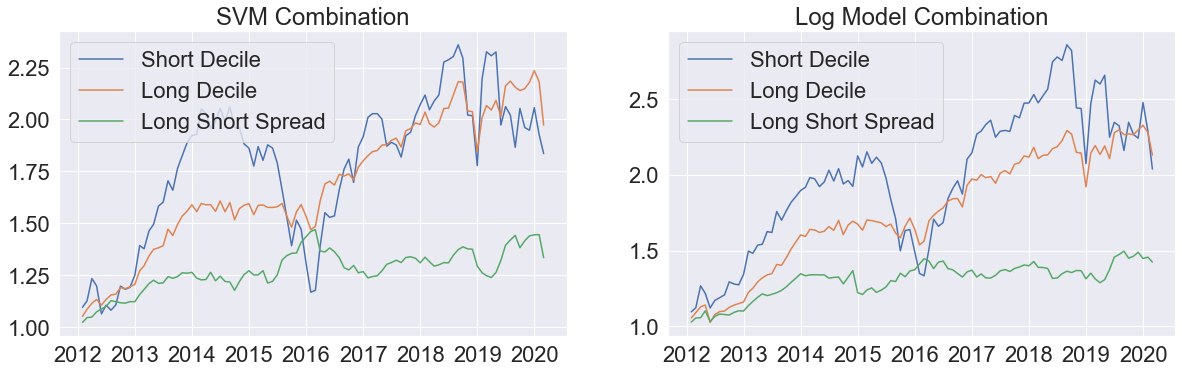

In [85]:
plot_returns(asas_bn24t)

We observe a similar pattern of results as with the original model. A much more volatile short decile and strong and sturdy long decile. Returns have slightly diminished compared to the original model.

# Conclusions/Analytical Takeaways

- We found that there is lack of persistence of returns in our factors. We observe that some of our factors have a year of great performance followed by poor performance in the next year. Thus factor timing is something worth exploring. 

- We found that the individial factor as well as combined factors models based on non beta neutral long short spreads do not generate any value because of significant exposure to market risk premium. 

- Models based on beta neutral long short spreads generate strong performances and even small positive information ratios over our benchmark i.e. Fama French Five Factors.

- We observed that support vector machines predictions are more robust compared to the logistic regression model based predictions, conversely logistic regression's model adapt more quickly to changing economic environment.

- Our chosen macro-economic variables do have some predictive power in able to ascertain which factors might generate positive performances in the future.

- When we run our strategies after varying our period size which we use to estimate beta for the beta neutral models, our Sharpe Ratio improves slightly without much changes in the Fama French risk decomposition of our returns.

- When we run our strategies in a construct where we vary number of best selected to 2 as opposed to the original strategy's 4, our Sharpe Ratios do not vary significantly. There is however a slight variation in the Fama French risk decomposition of our returns which is unsurprising because our factor selection changes for every monthly rebalance.

- When we run our strategies in a construct where we reduce the training period of the SVM/Logistic Regressiom Models intended to find the best factors, our strategies takes a slight dip but not a very significant one. There are some albeit tolerable changes in the Fama French Risk Decomposition of our strategies.

- Thus we found that our strategy is robust, since after changing some of the parameter specification, we did not observe a strong deviation in returns.


# References

### 1. The Promises and Pitfalls of Factor Timing, (2017) - Bender, Sun, Thomas and Zdorovtsov

### 2.  How do Factor Premia Vary Over Time? A Century of Evidence (2019) -  Ilmanen,  Israel, Moskowitz,  Thapar, and Wang

### 3. Adaboost-SVM Multi-Factor Stock Selection Model Based on Adaboost Enhancement (2018) - Zhang, Lin, Chen and Zhao